In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random

%matplotlib inline


crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")


In [2]:
d_time = pd.to_datetime(crimes["Dispatch Date / Time"])

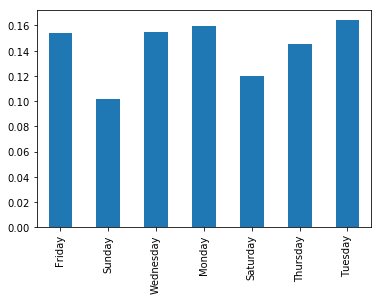

In [3]:
d_time.dt.weekday_name.value_counts(normalize=True, ascending=False, sort=False).plot(kind='bar')

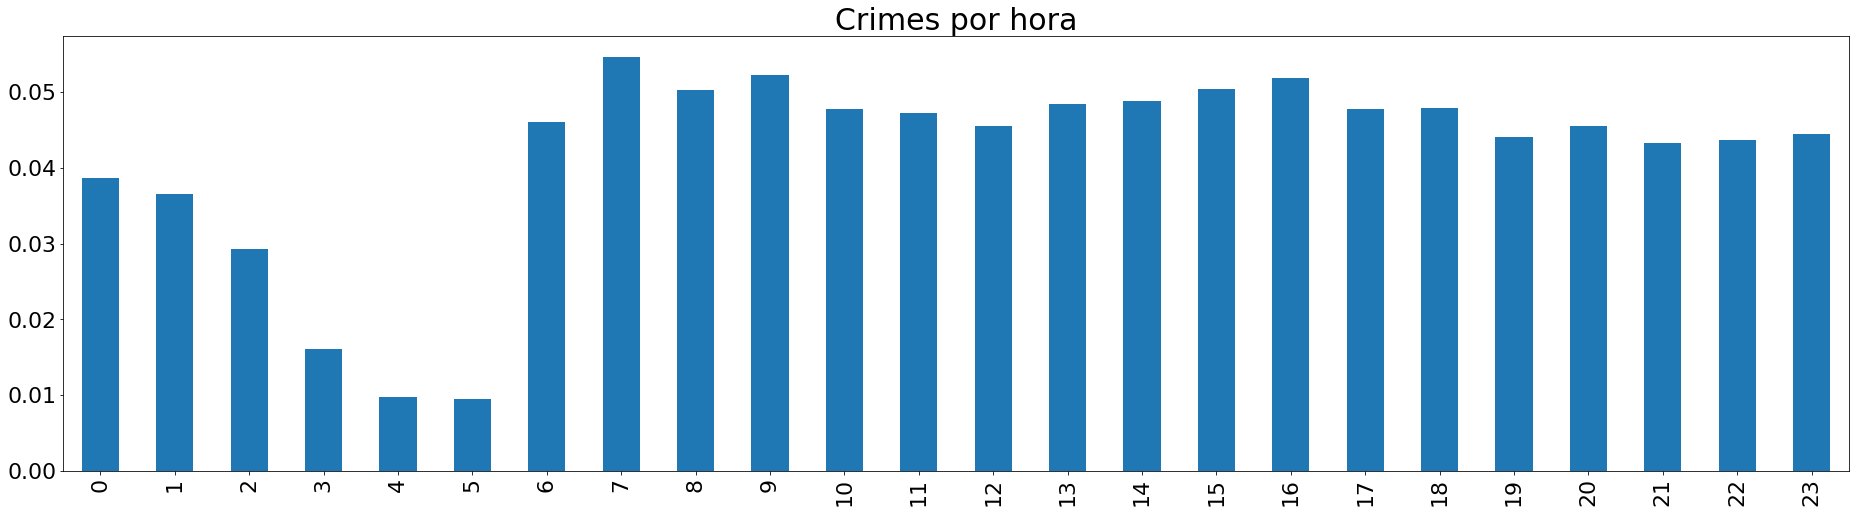

In [4]:
d_time.dt.hour.value_counts(normalize=True, ascending=True).sort_index().plot(kind='bar', 
                                                                              figsize = [32, 8], 
                                                                              fontsize=22)

plt.title("Crimes por hora", fontsize=30)


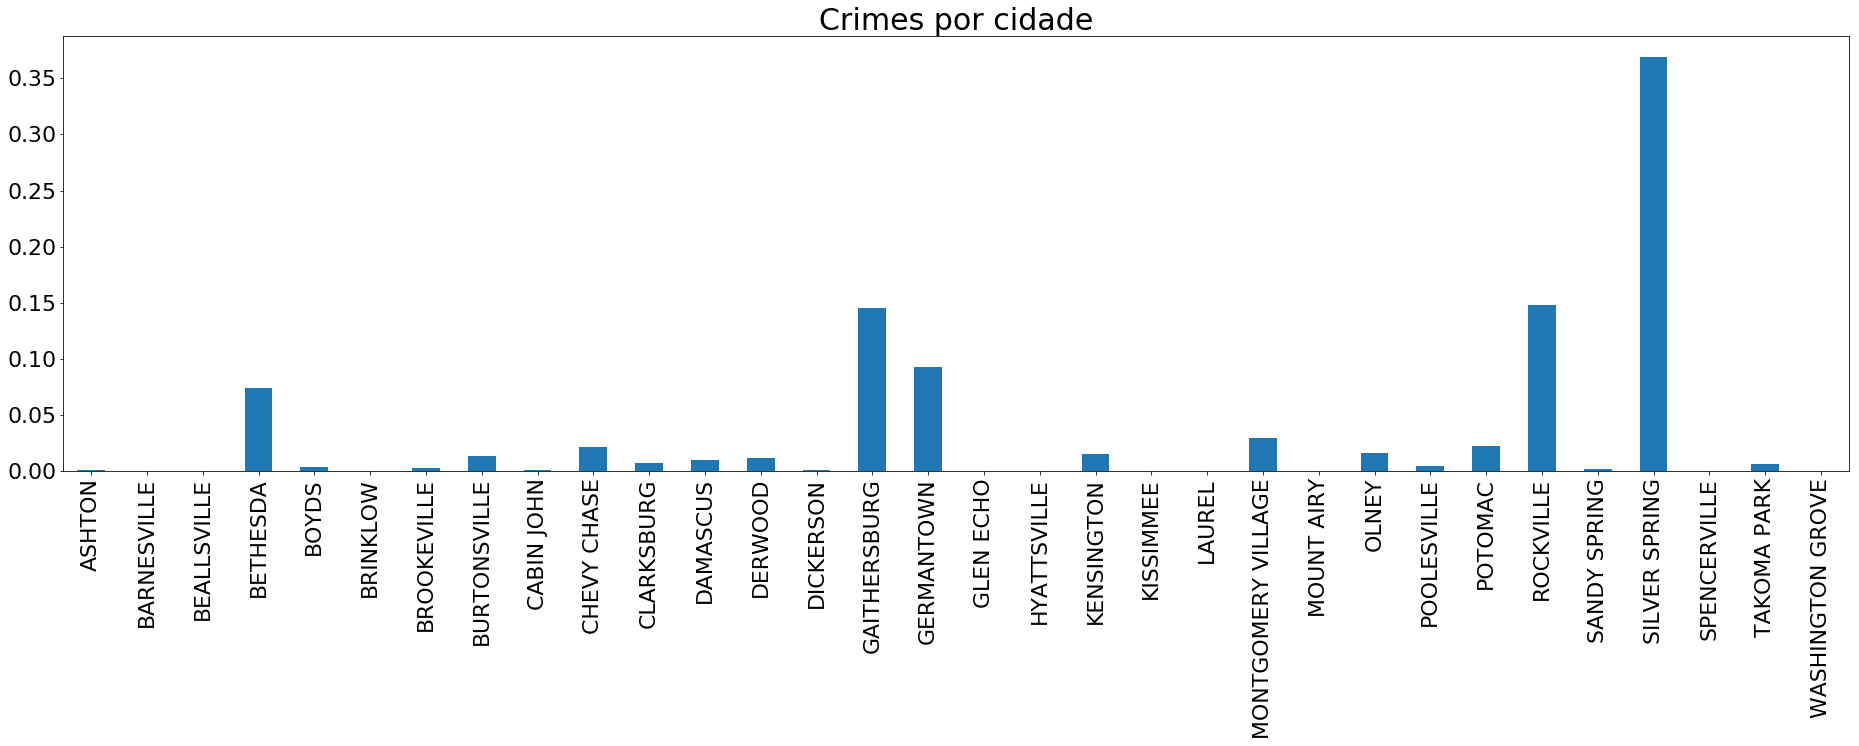

In [5]:
crimes['City'].value_counts(normalize=True, ascending=True).sort_index().plot(kind='bar', 
                                                                              figsize = [32, 8],
                                                                              fontsize=22)
plt.title("Crimes por cidade", fontsize=30)


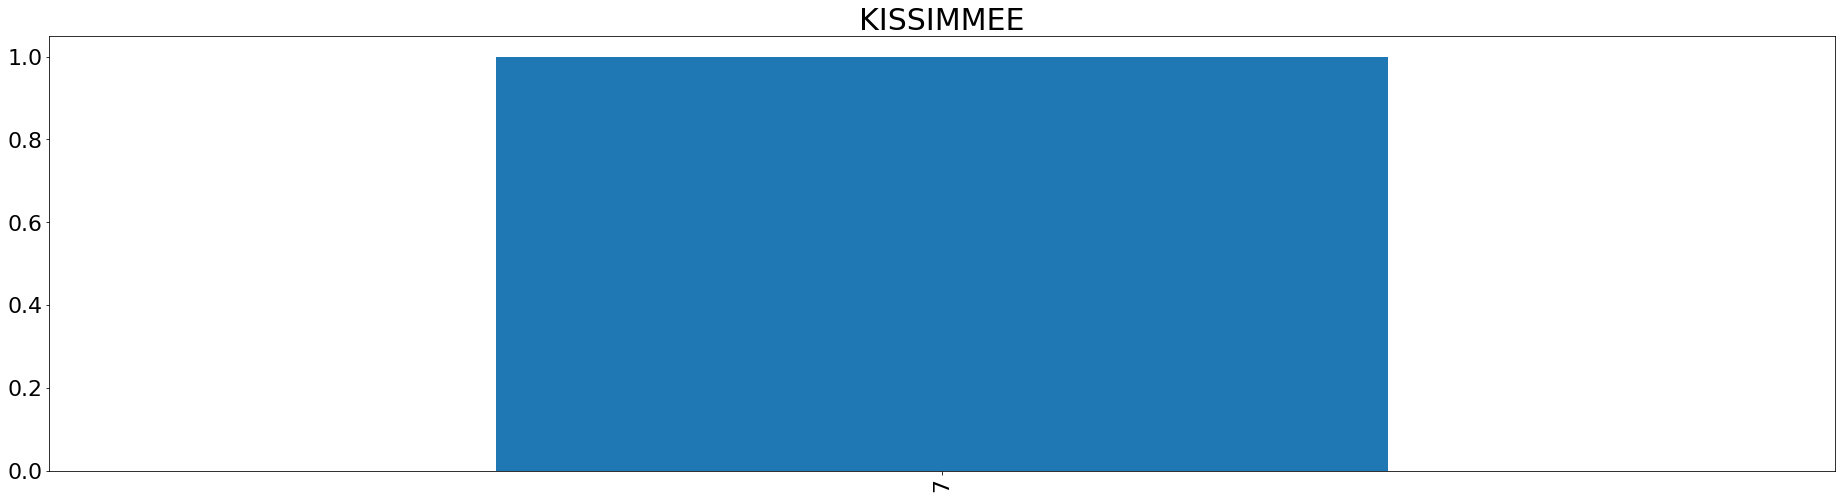

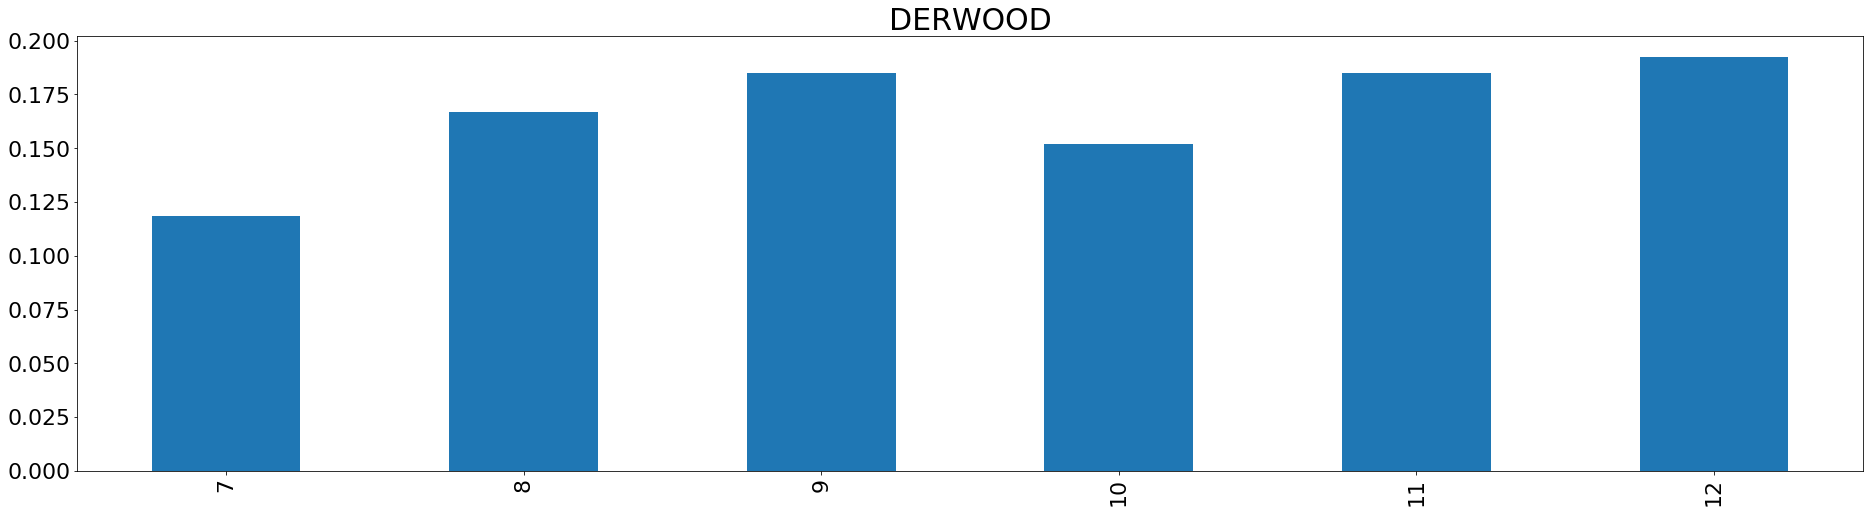

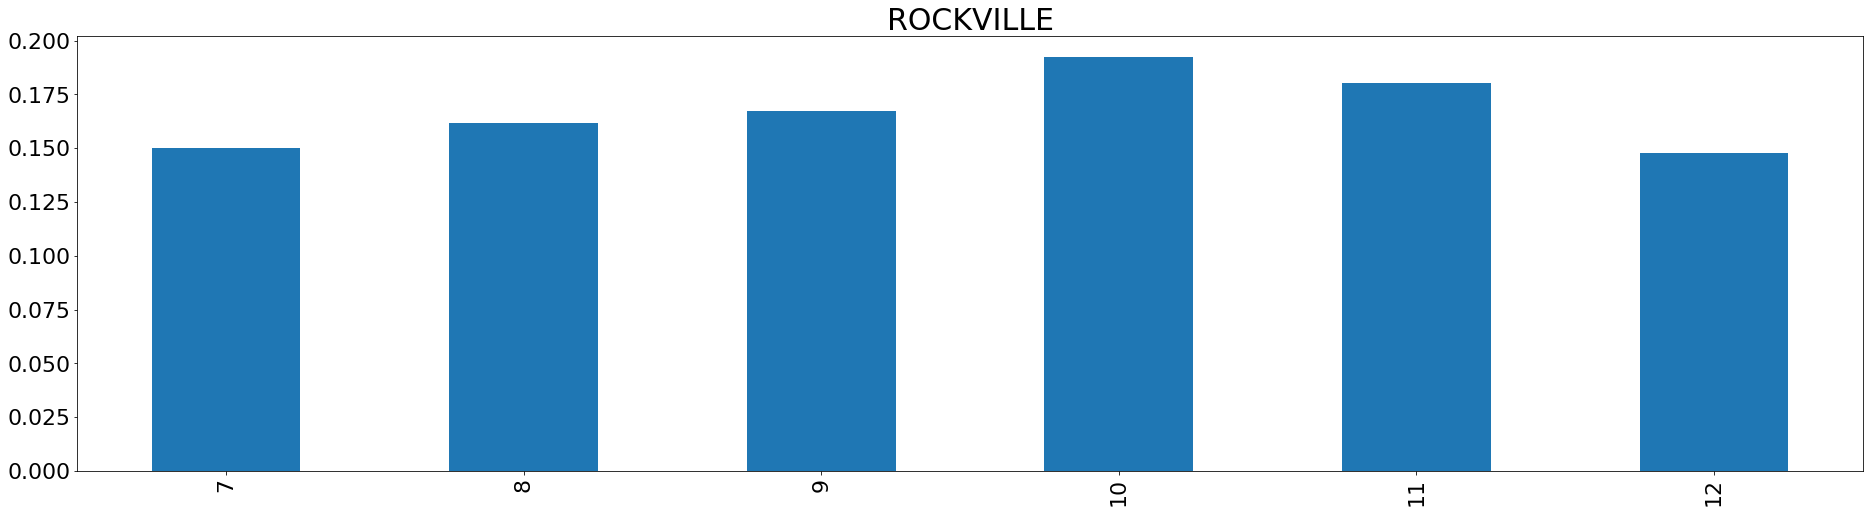

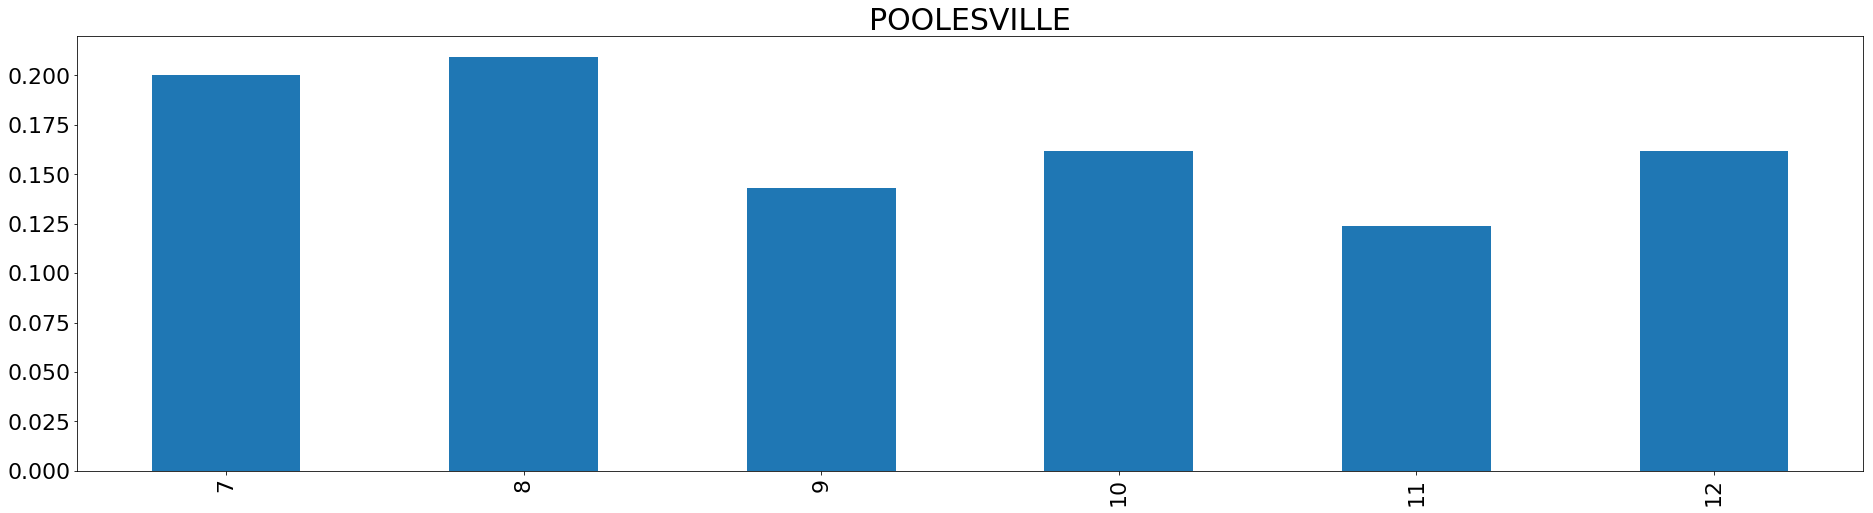

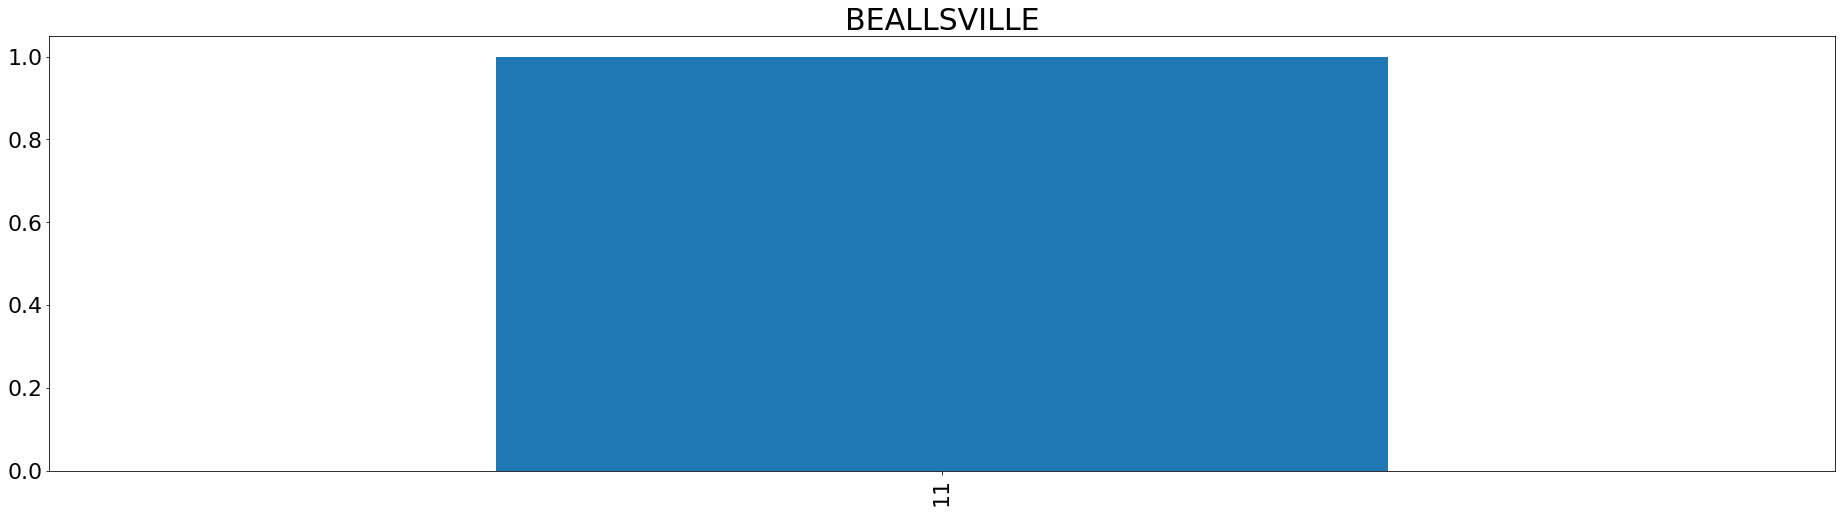

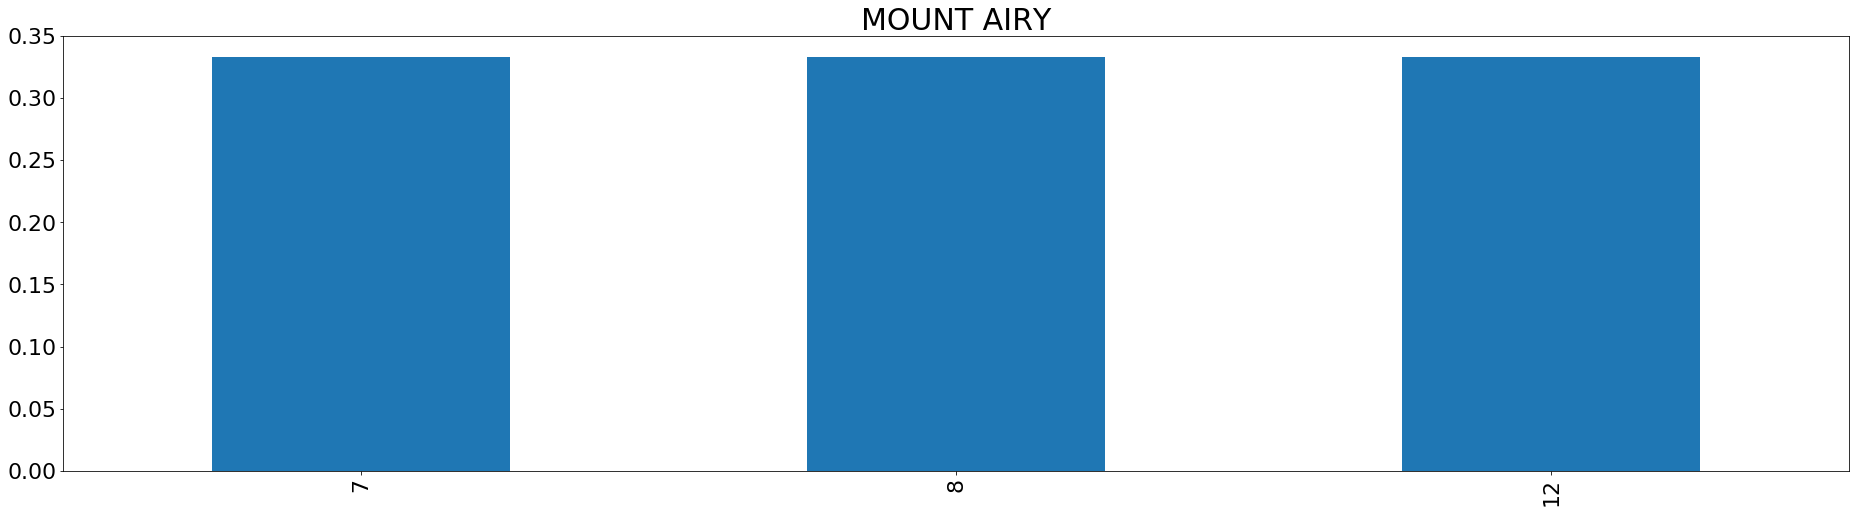

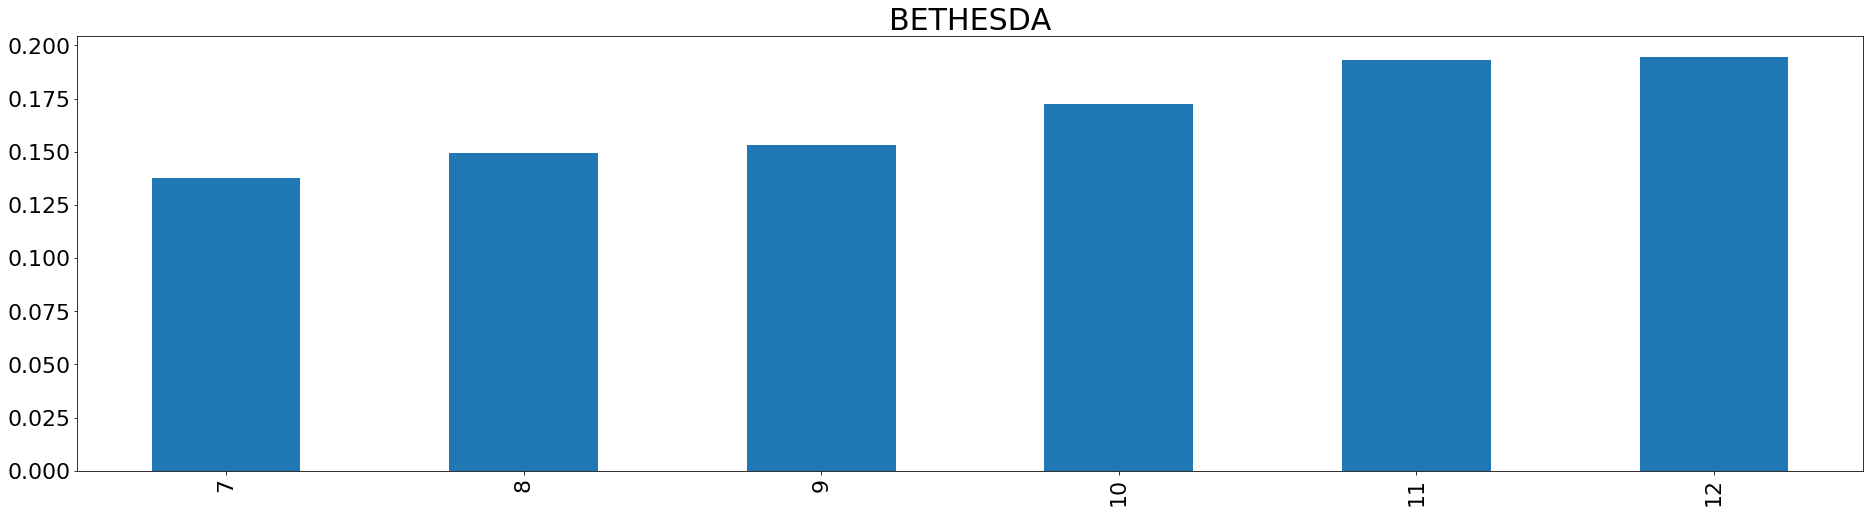

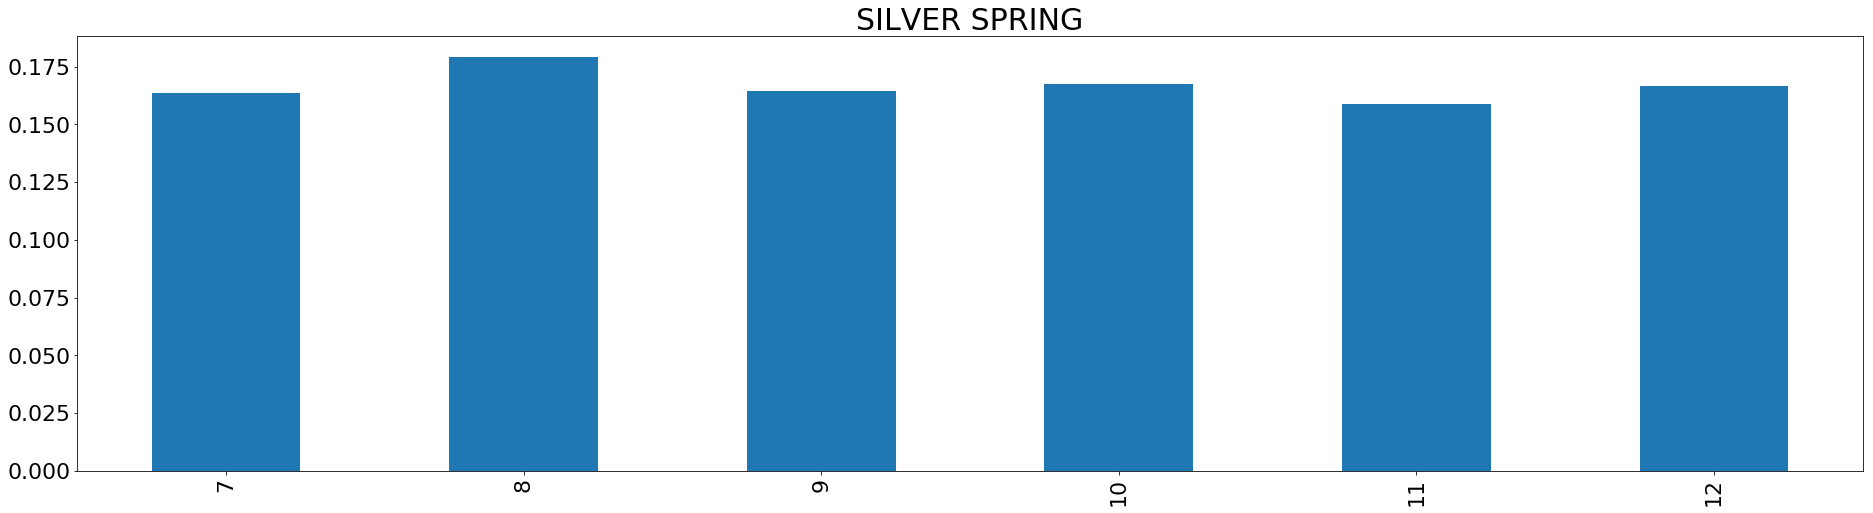

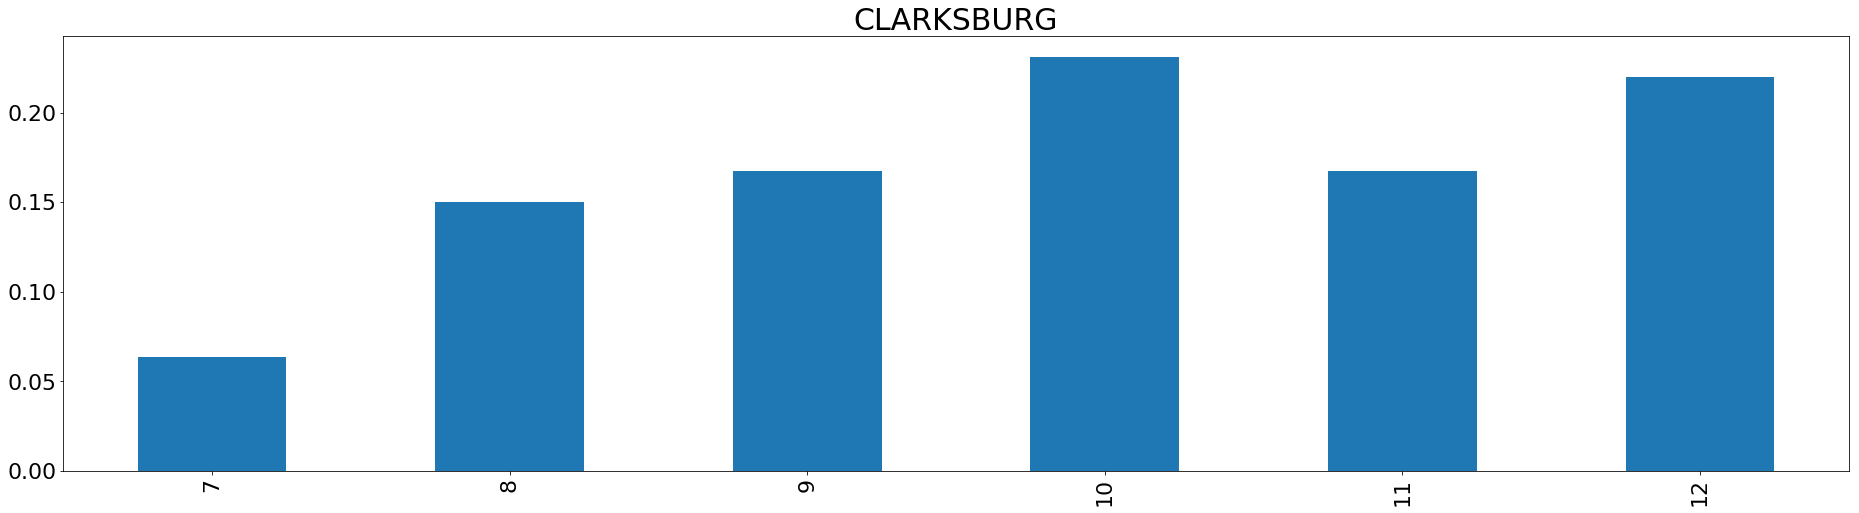

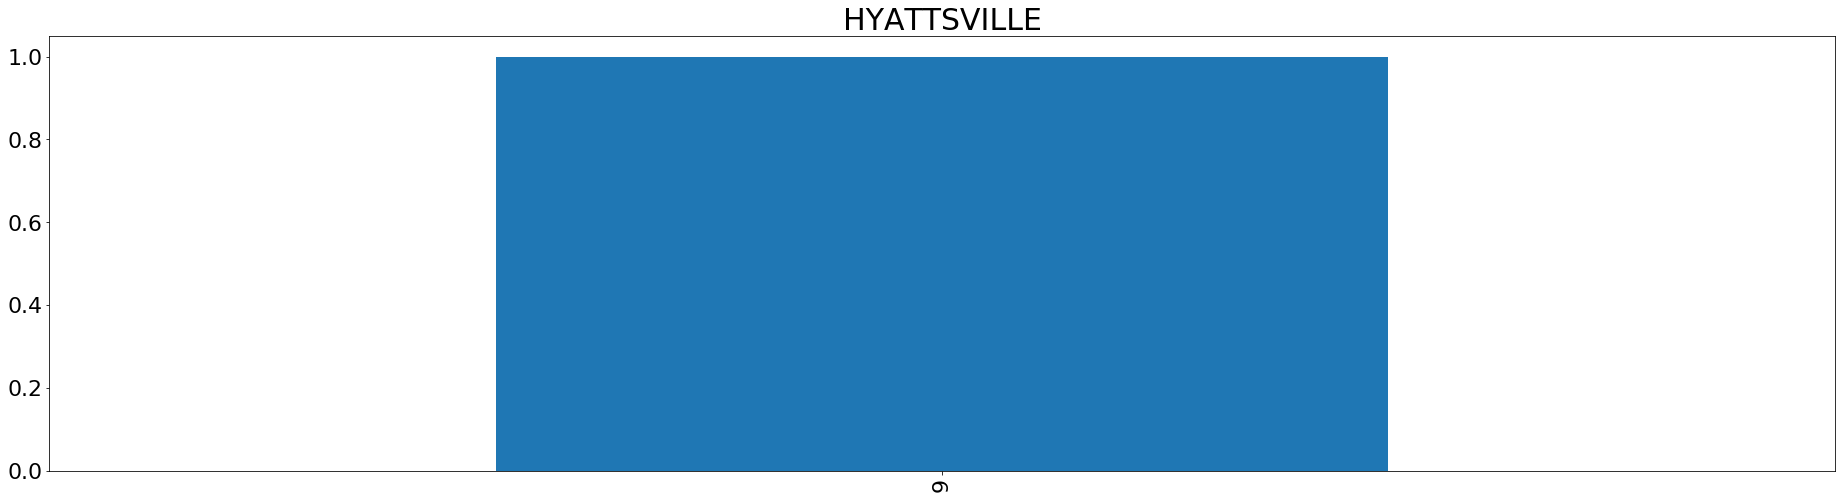

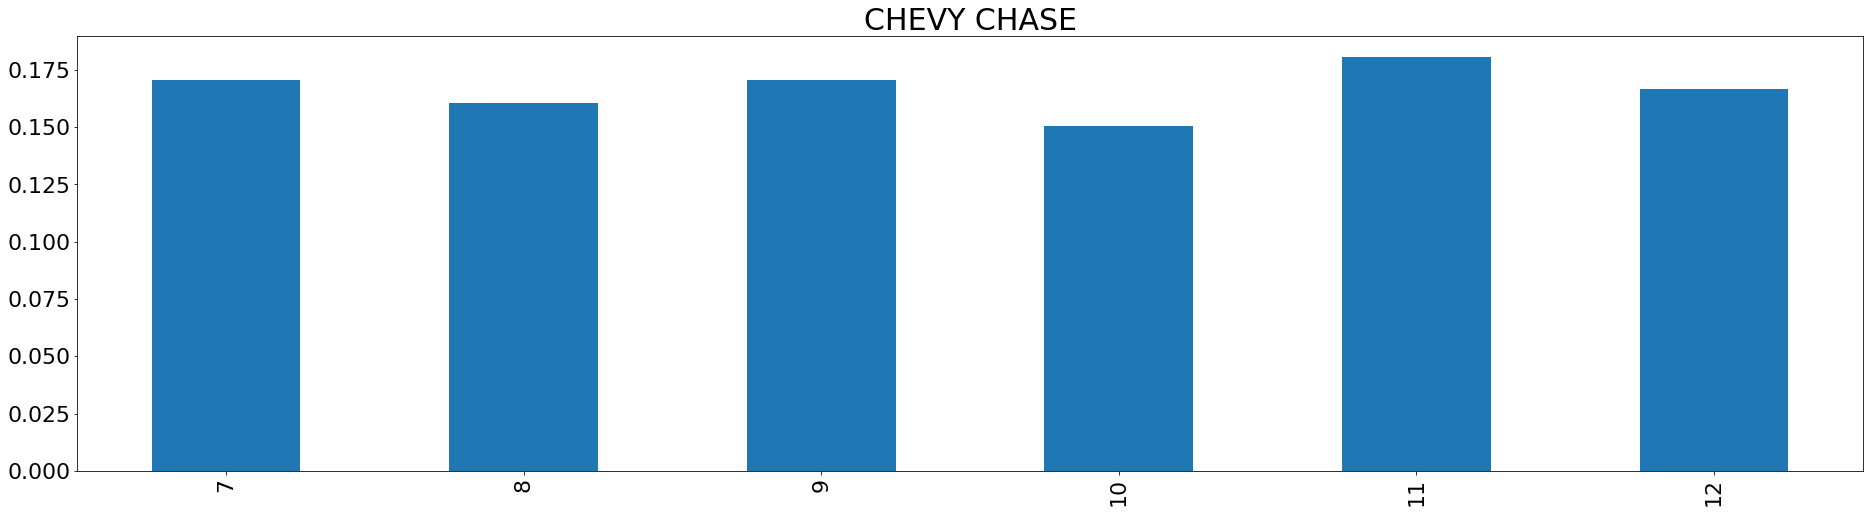

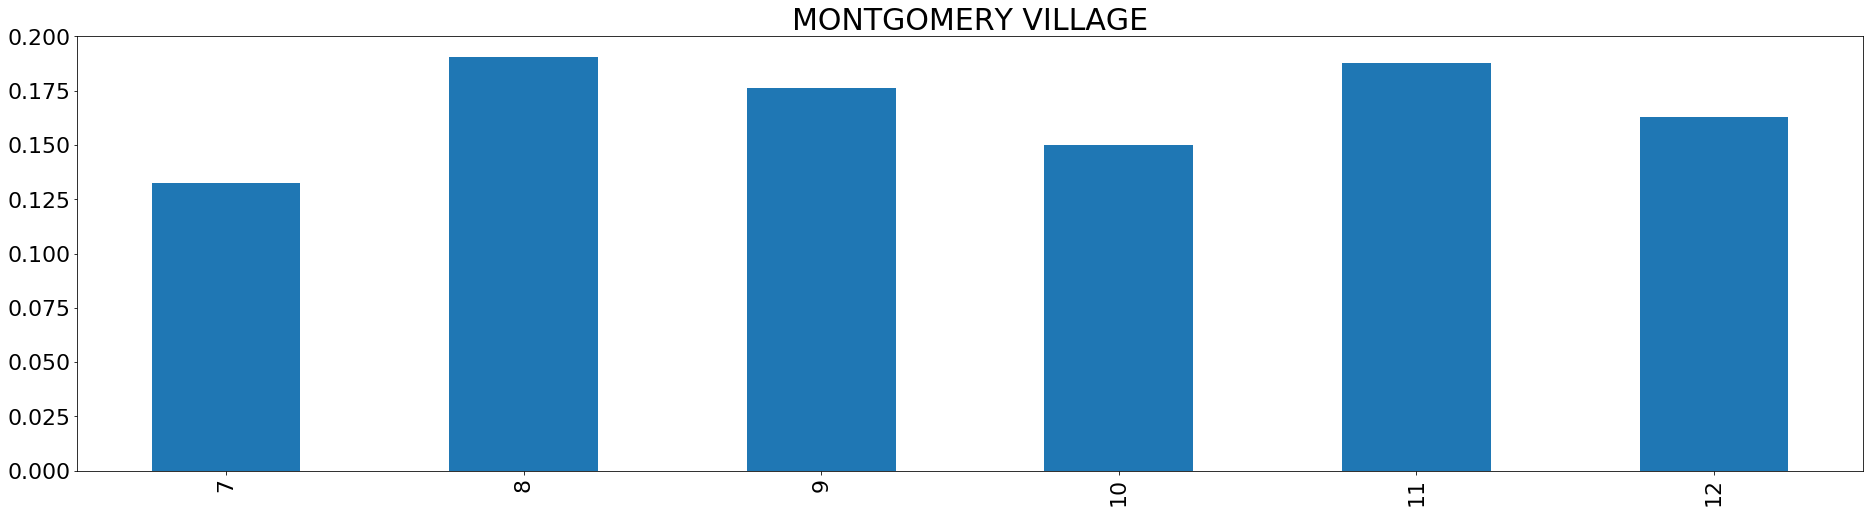

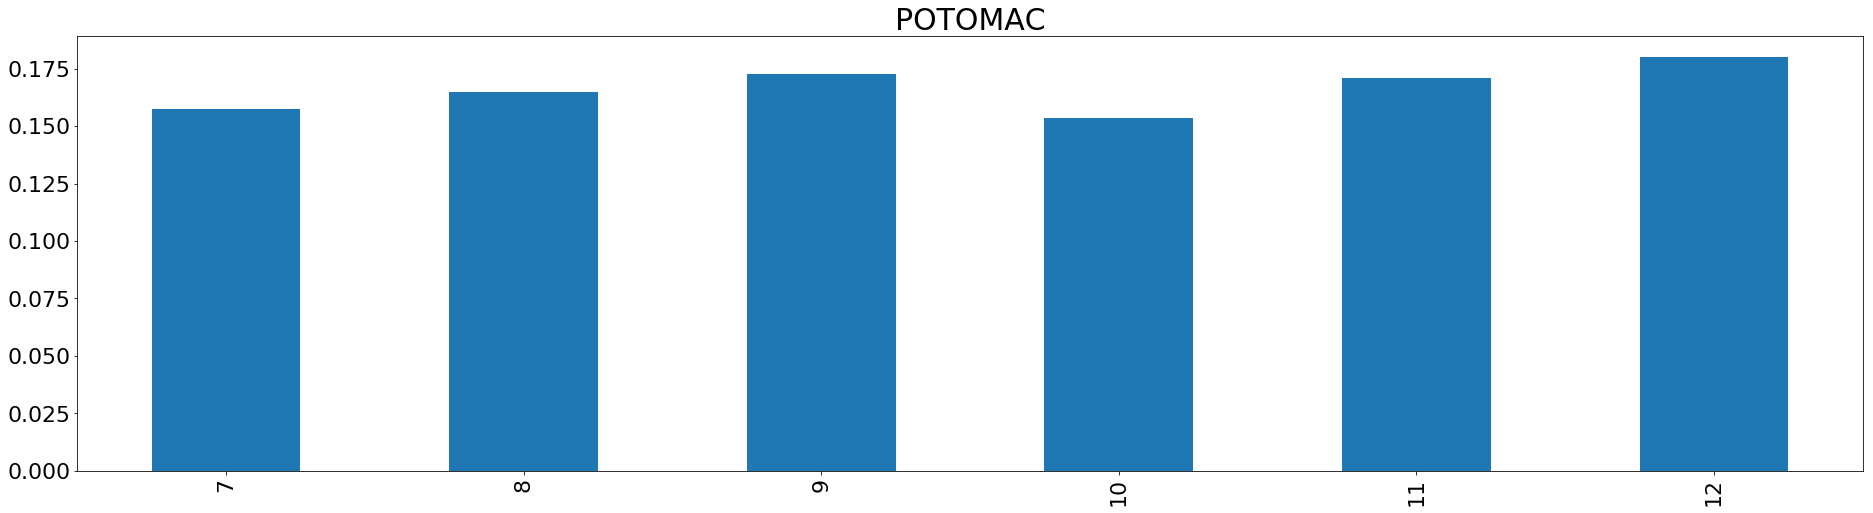

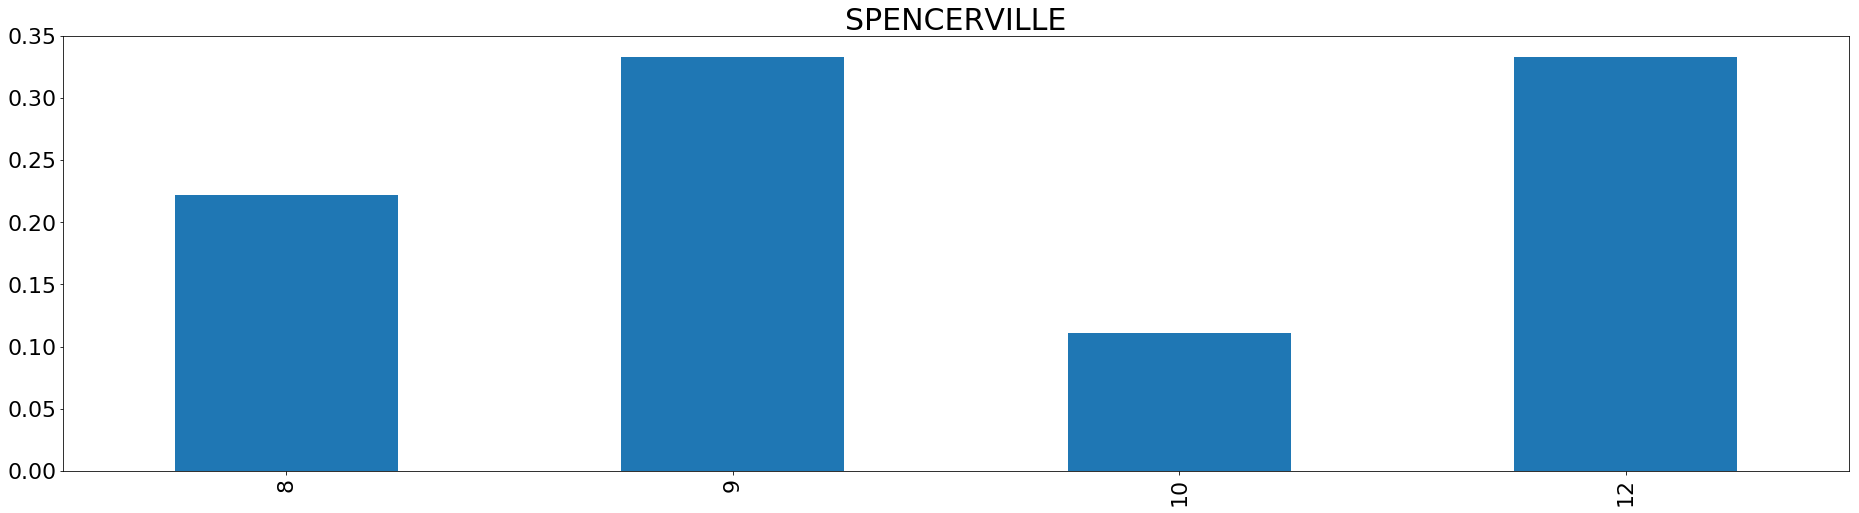

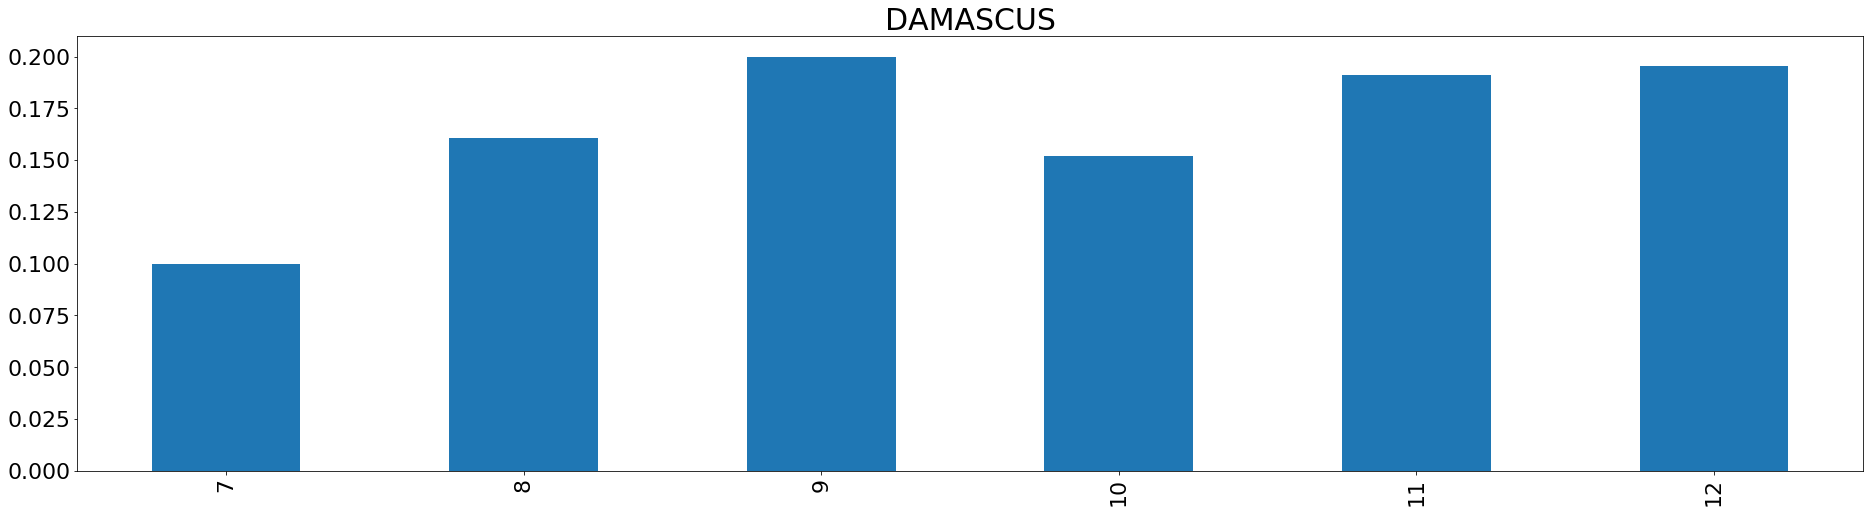

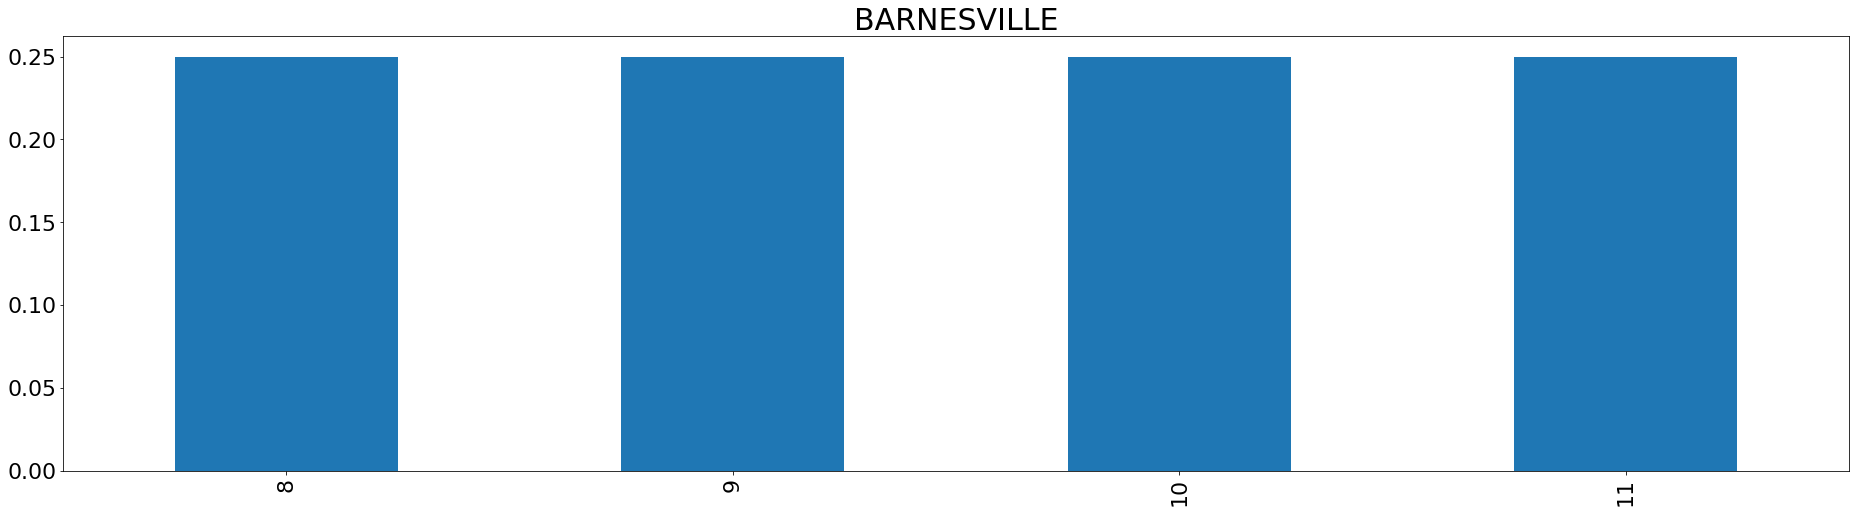

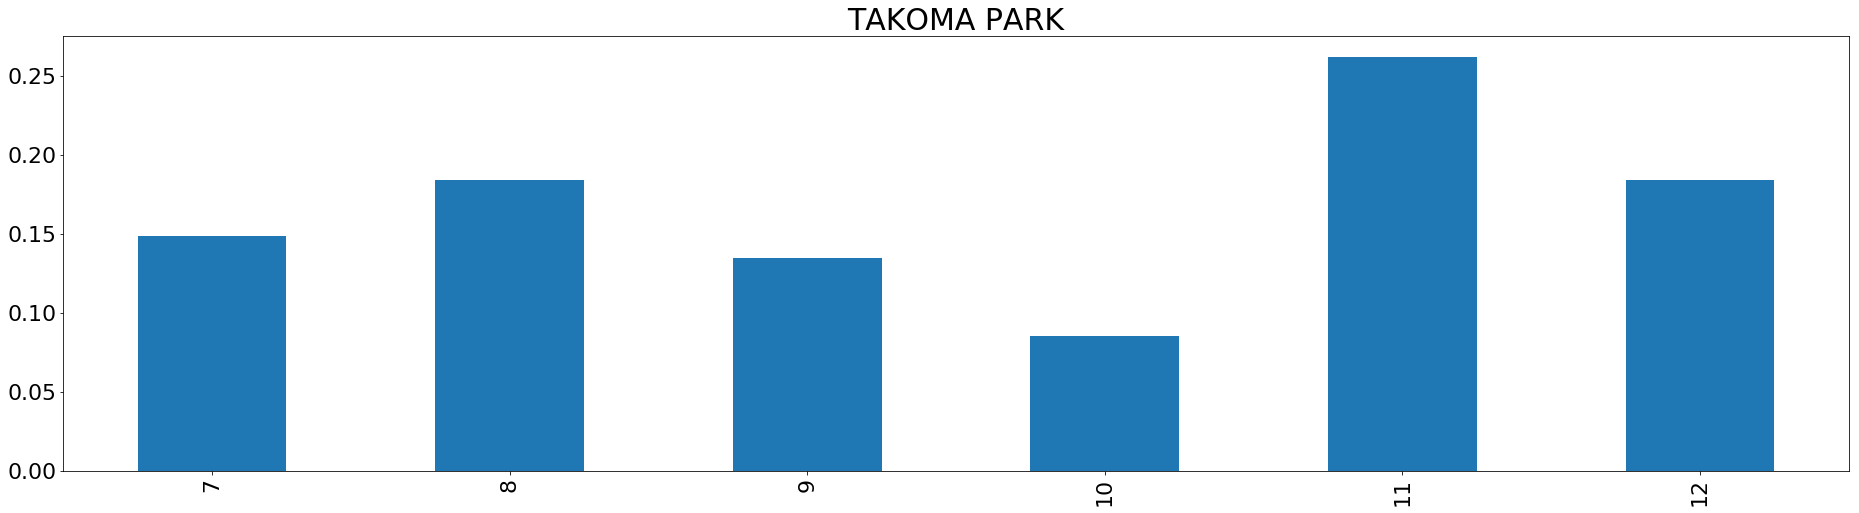

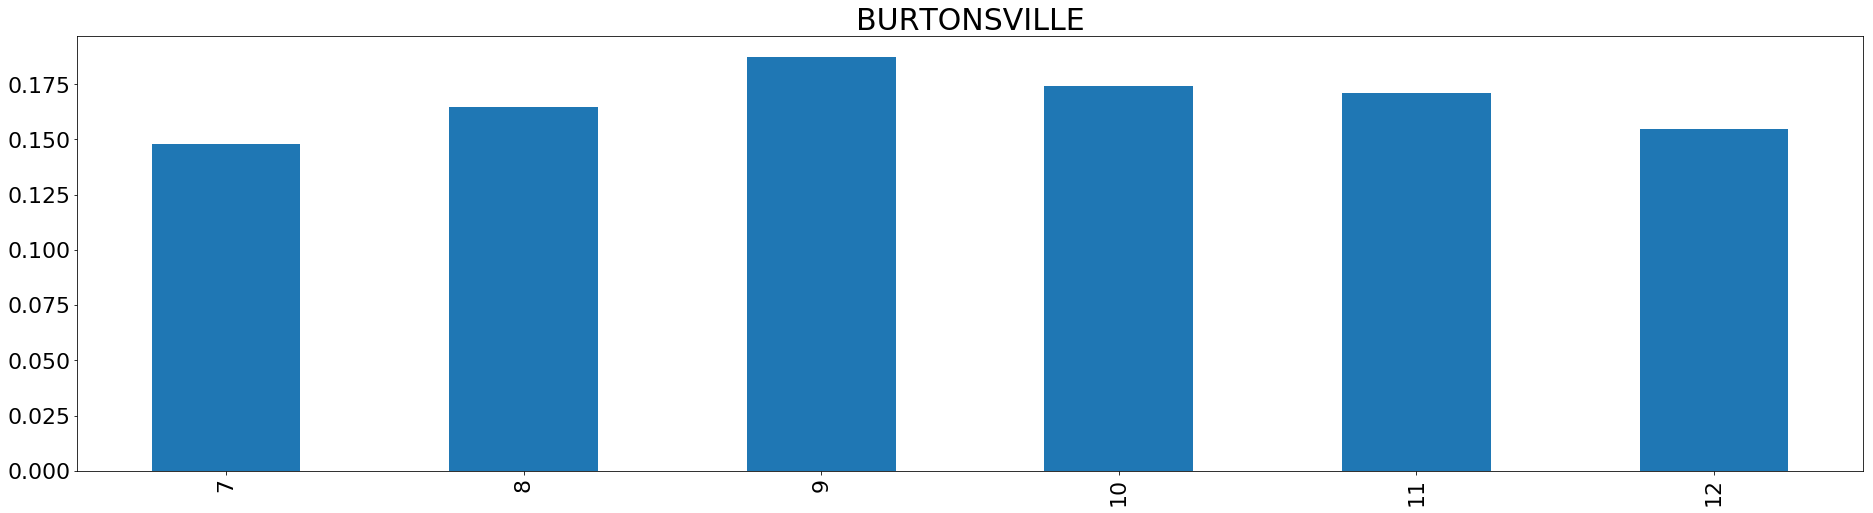

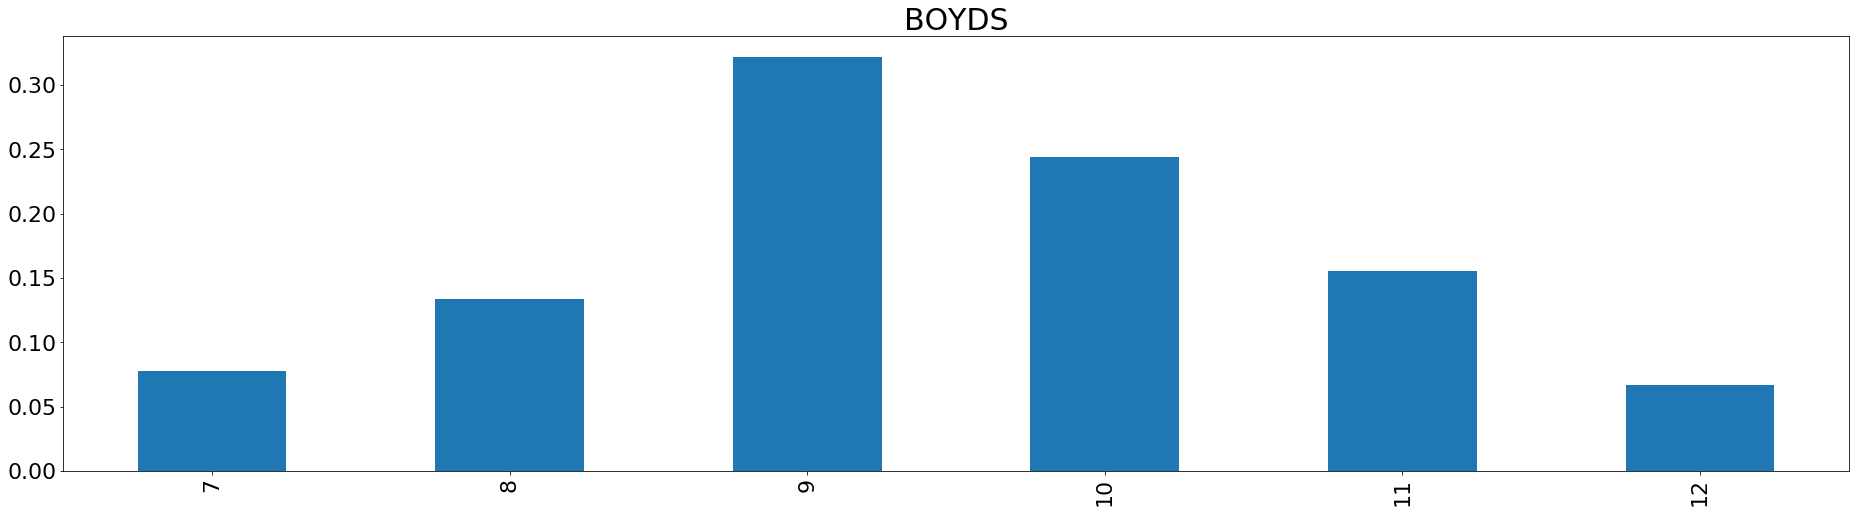

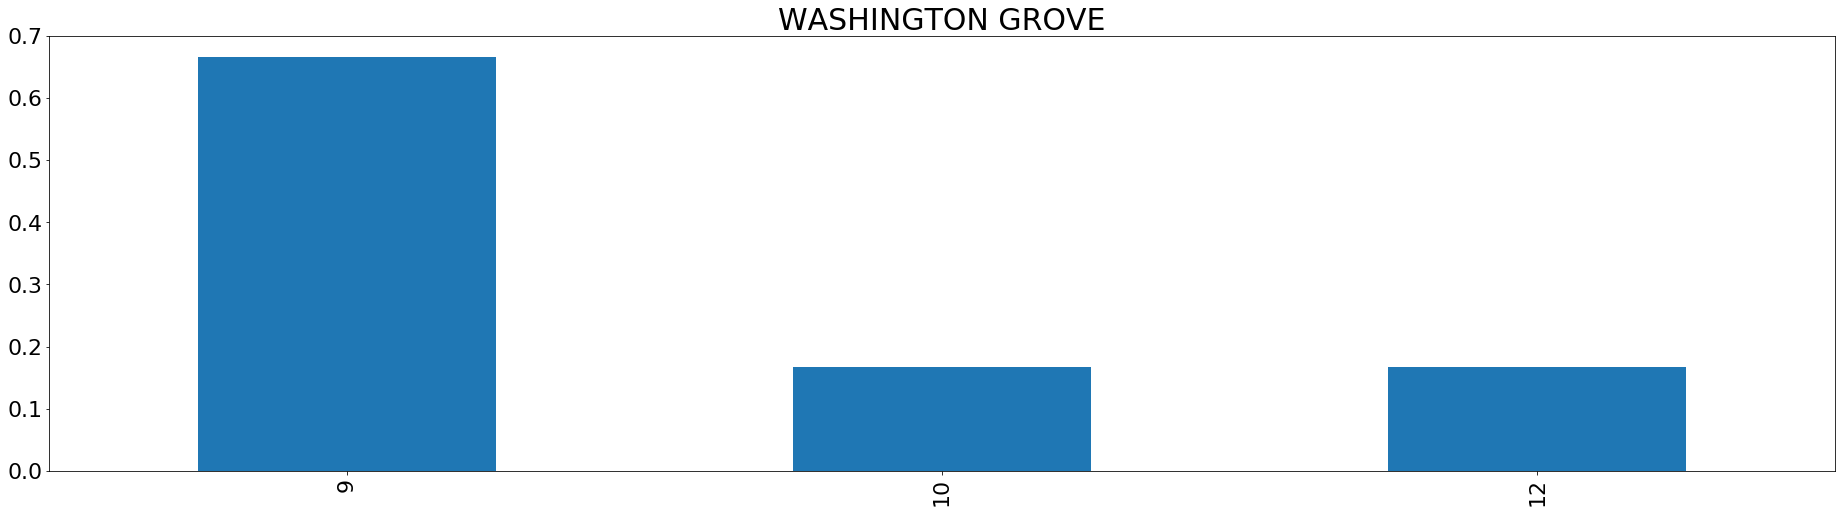

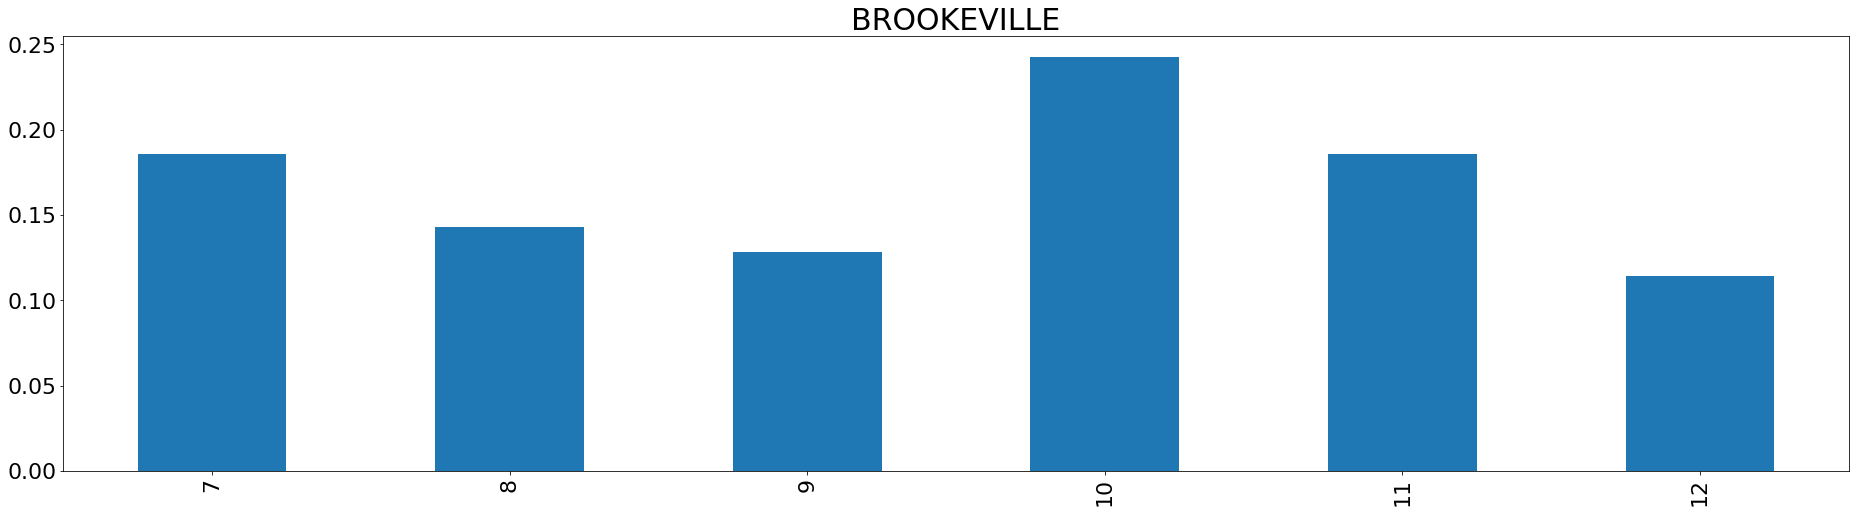

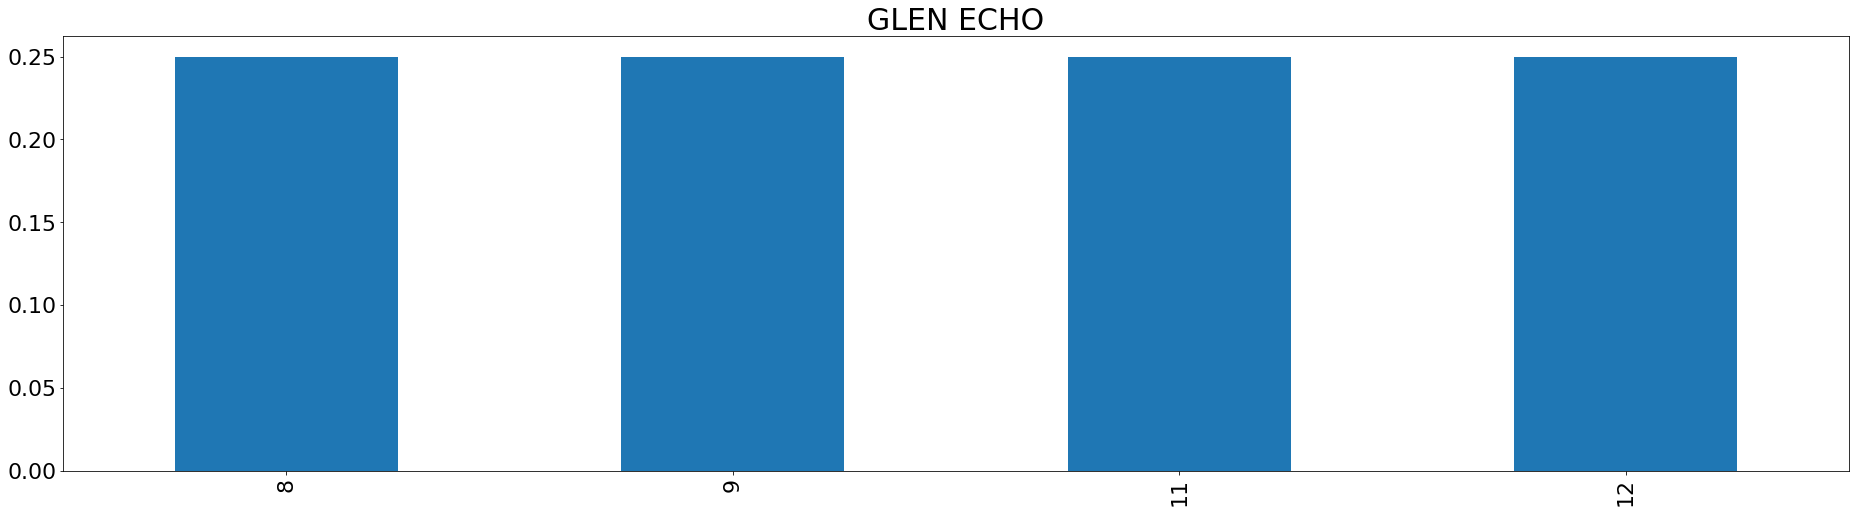

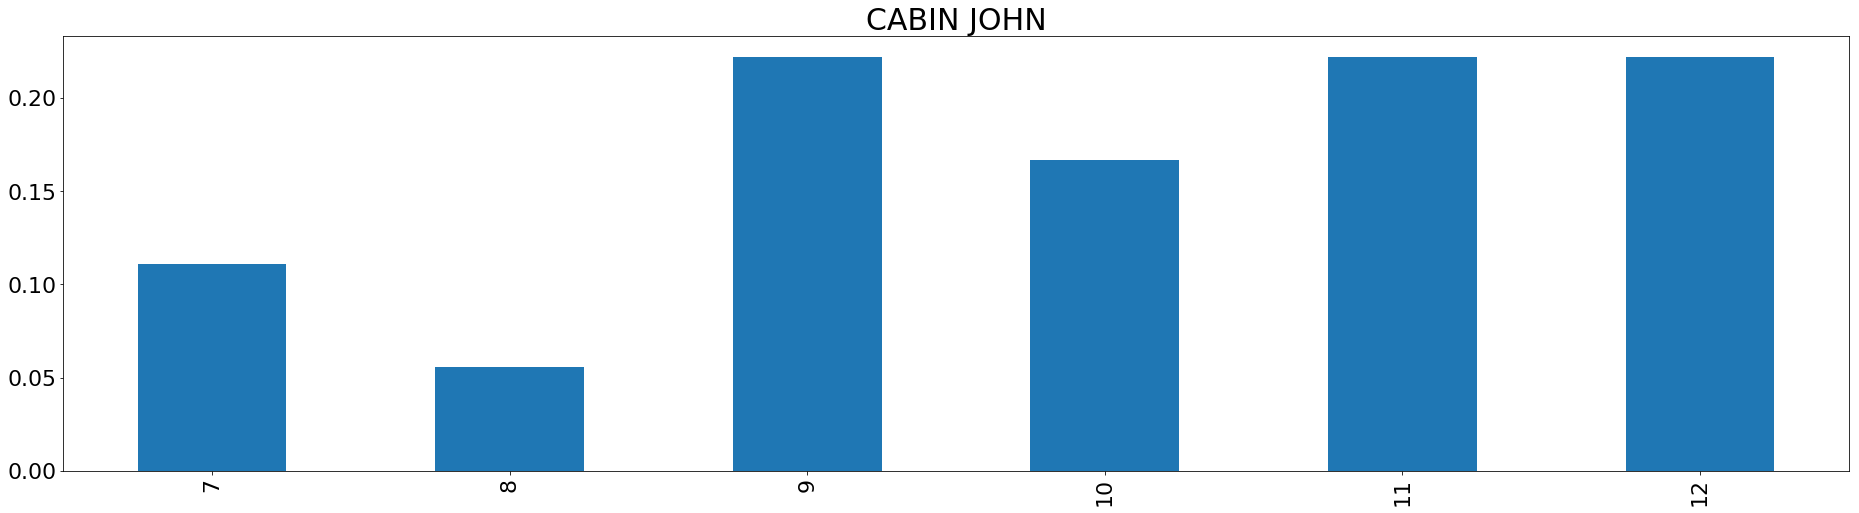

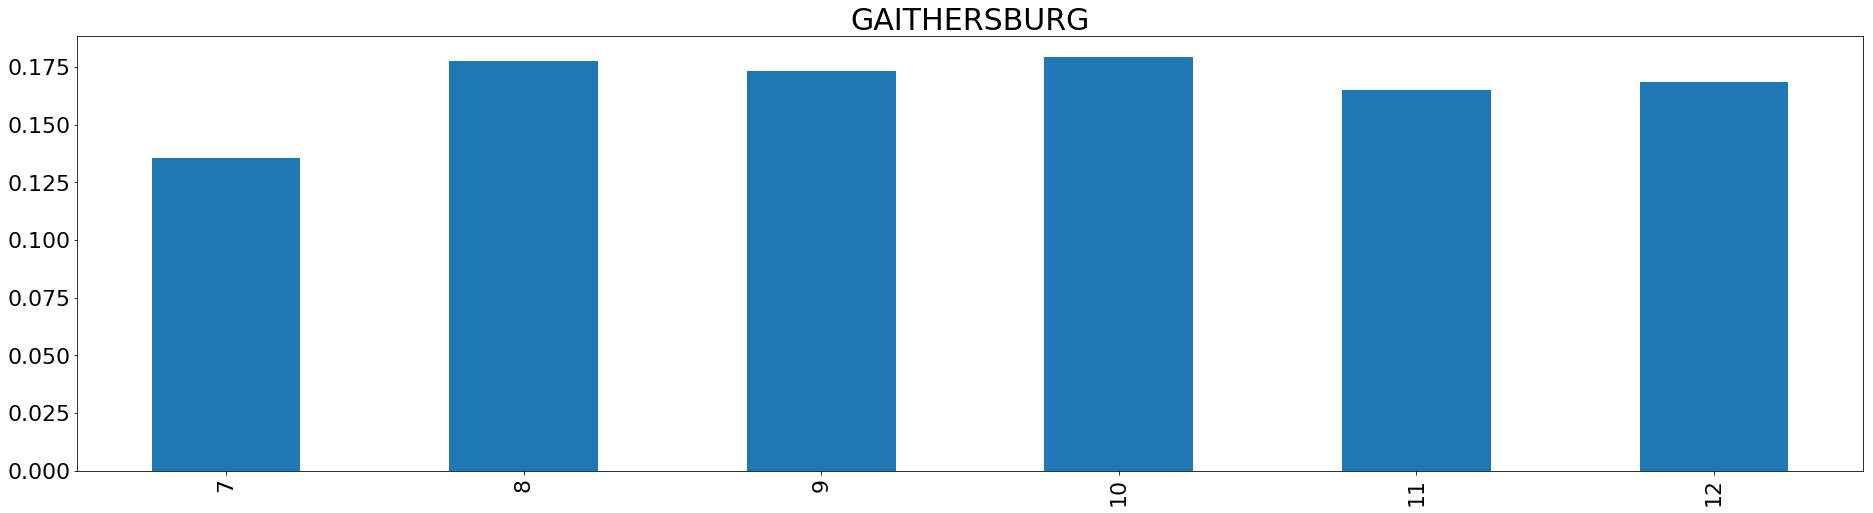

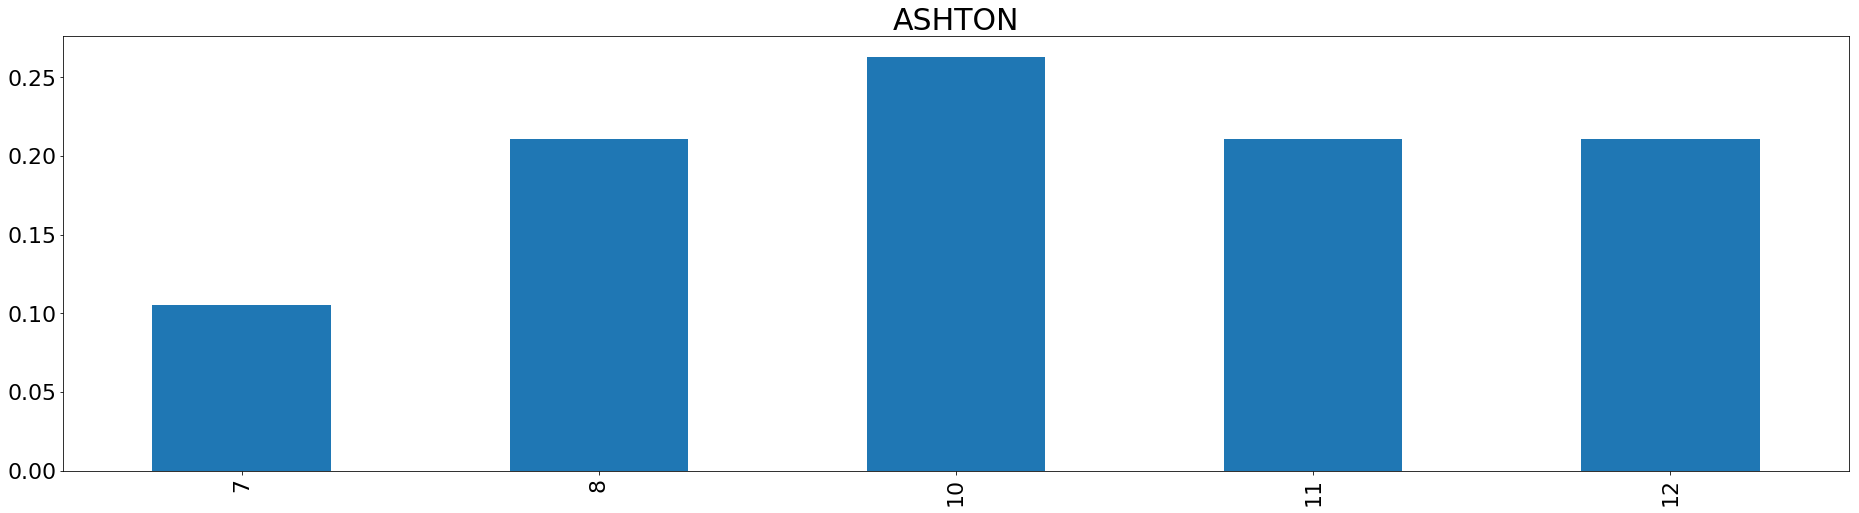

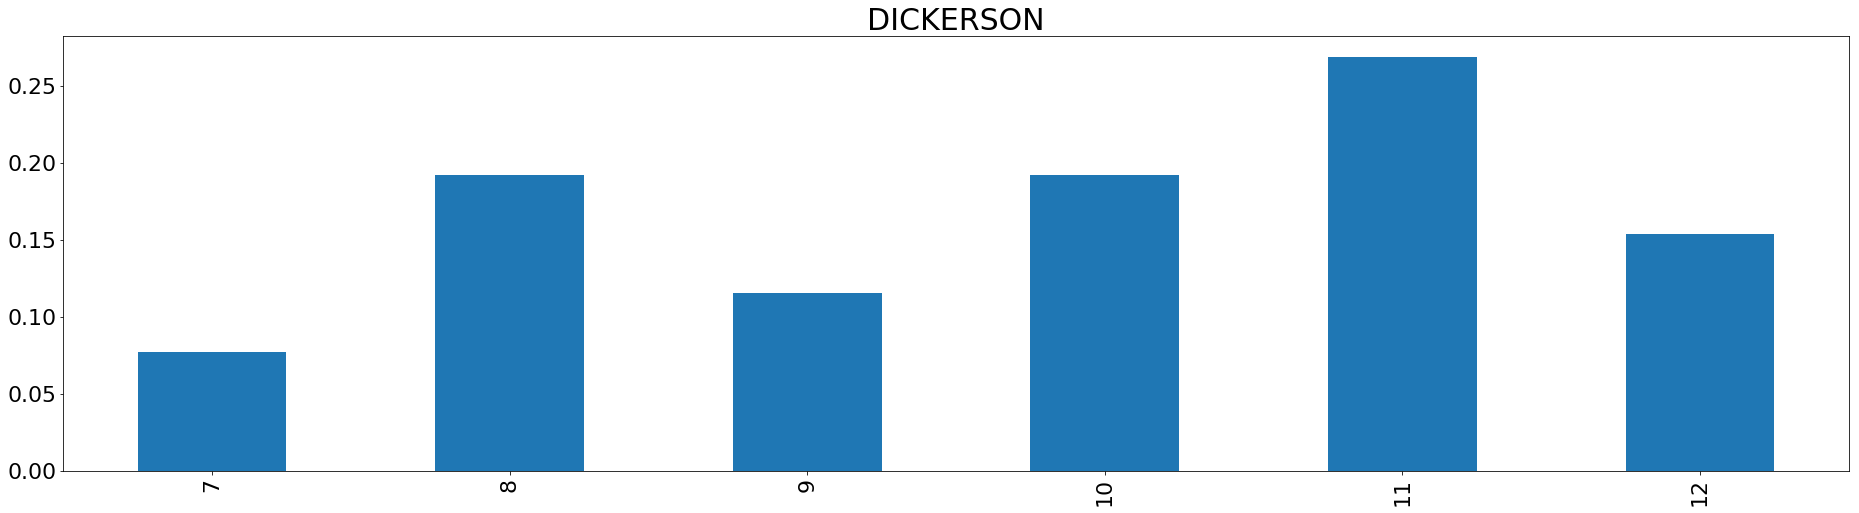

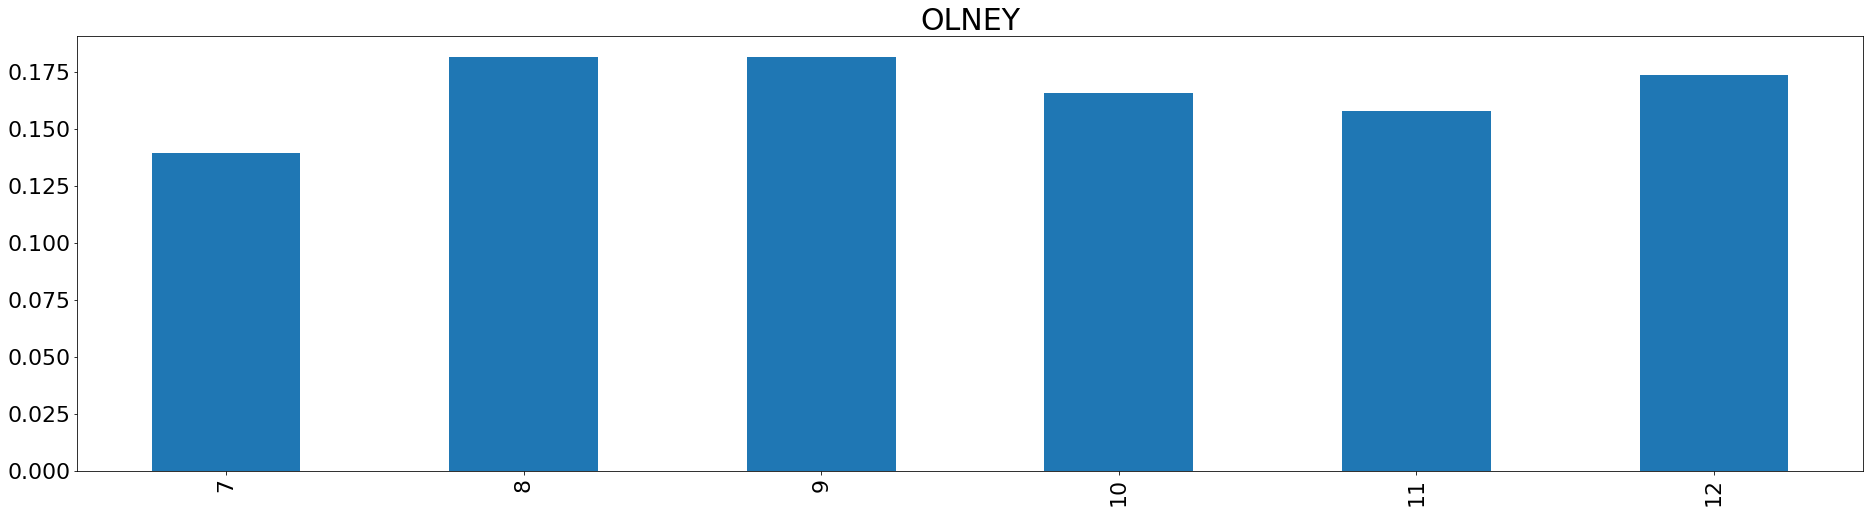

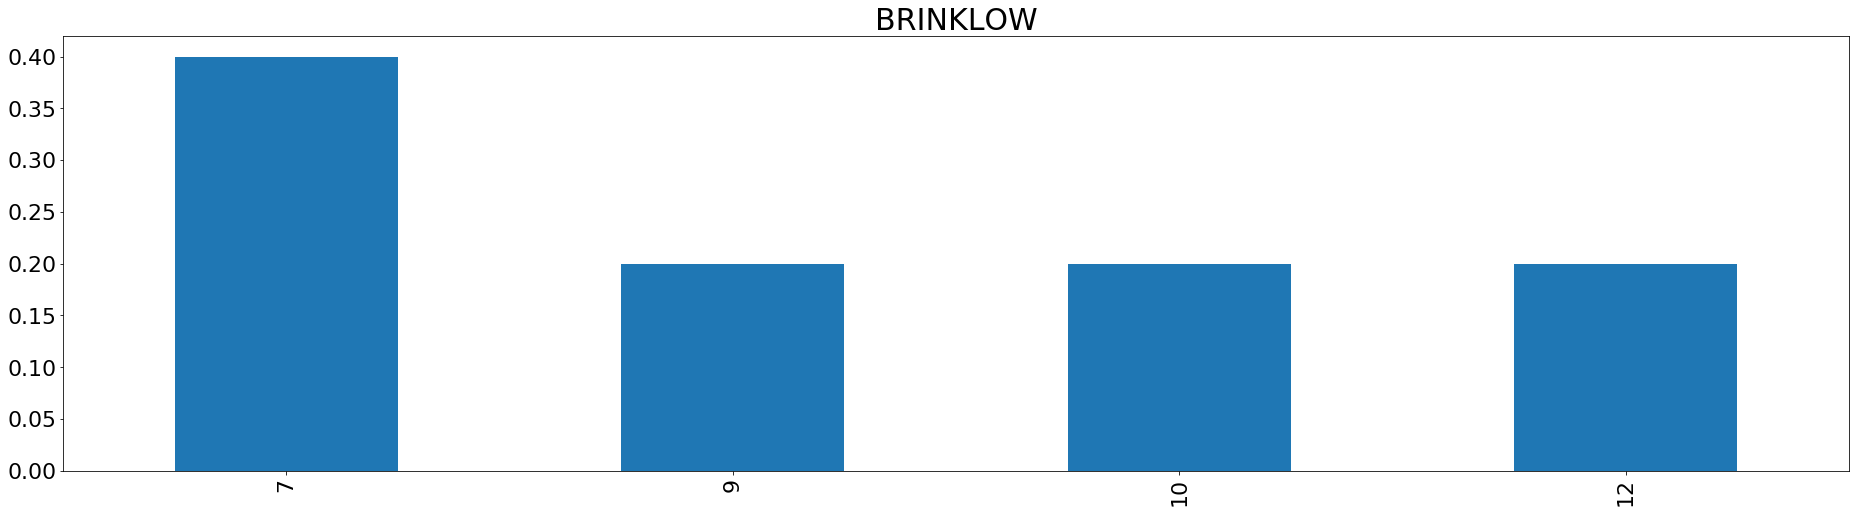

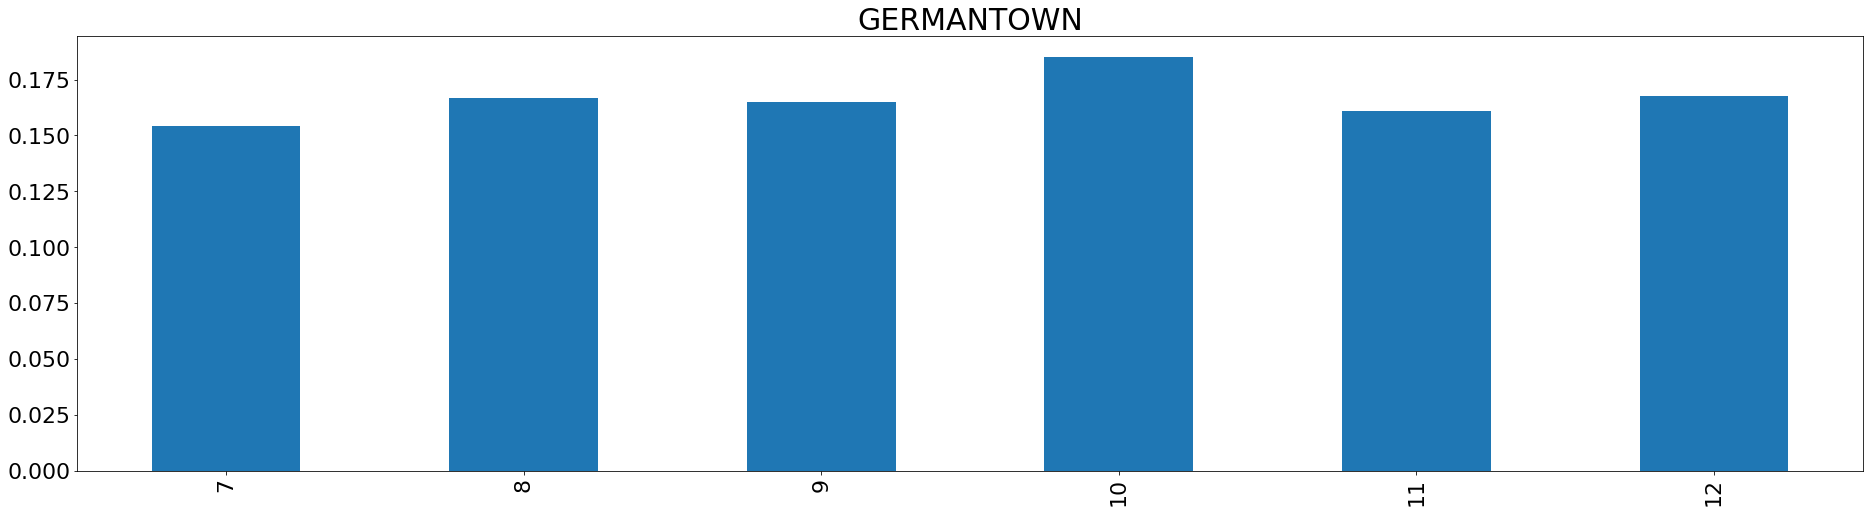

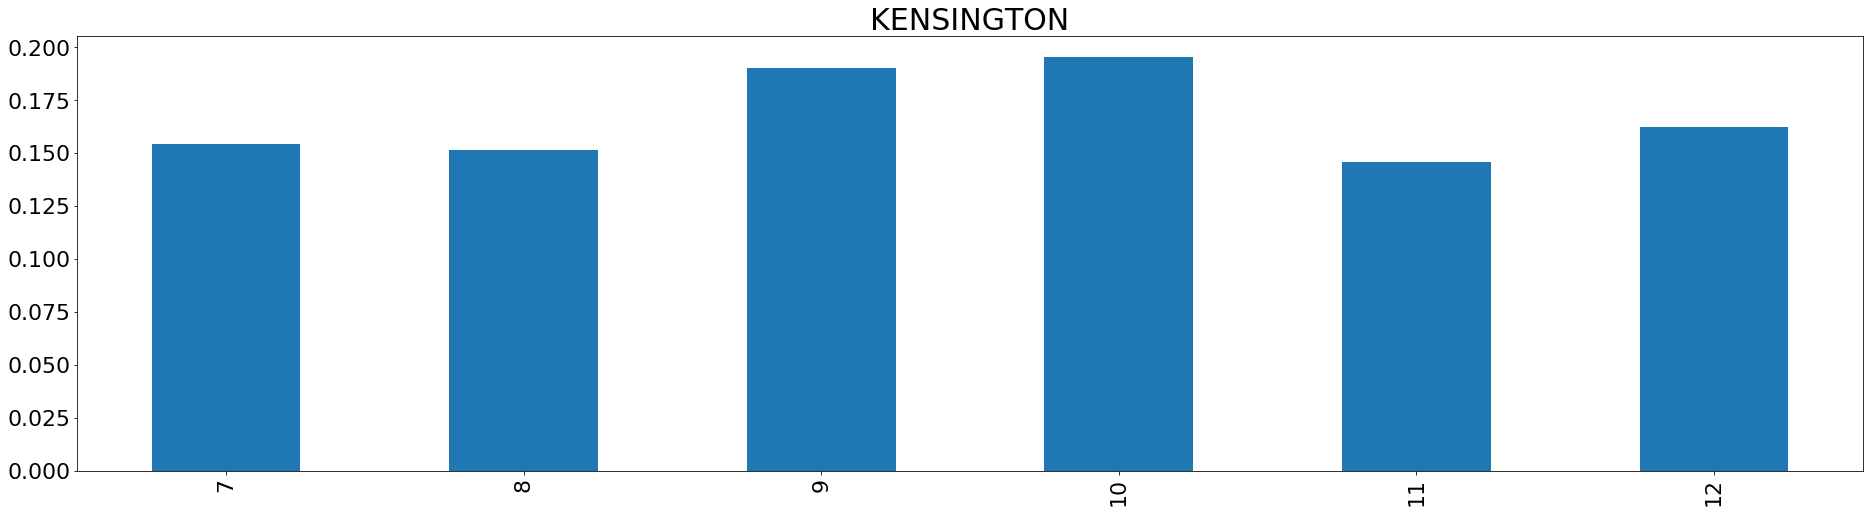

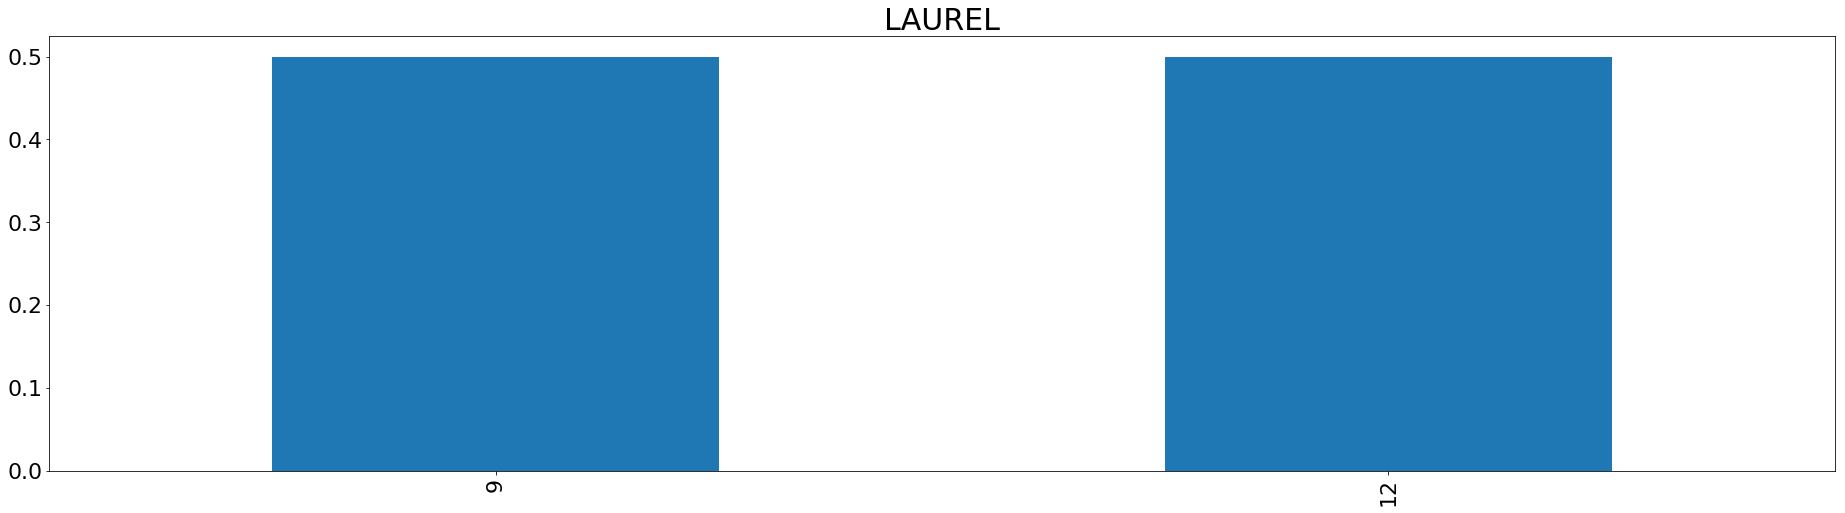

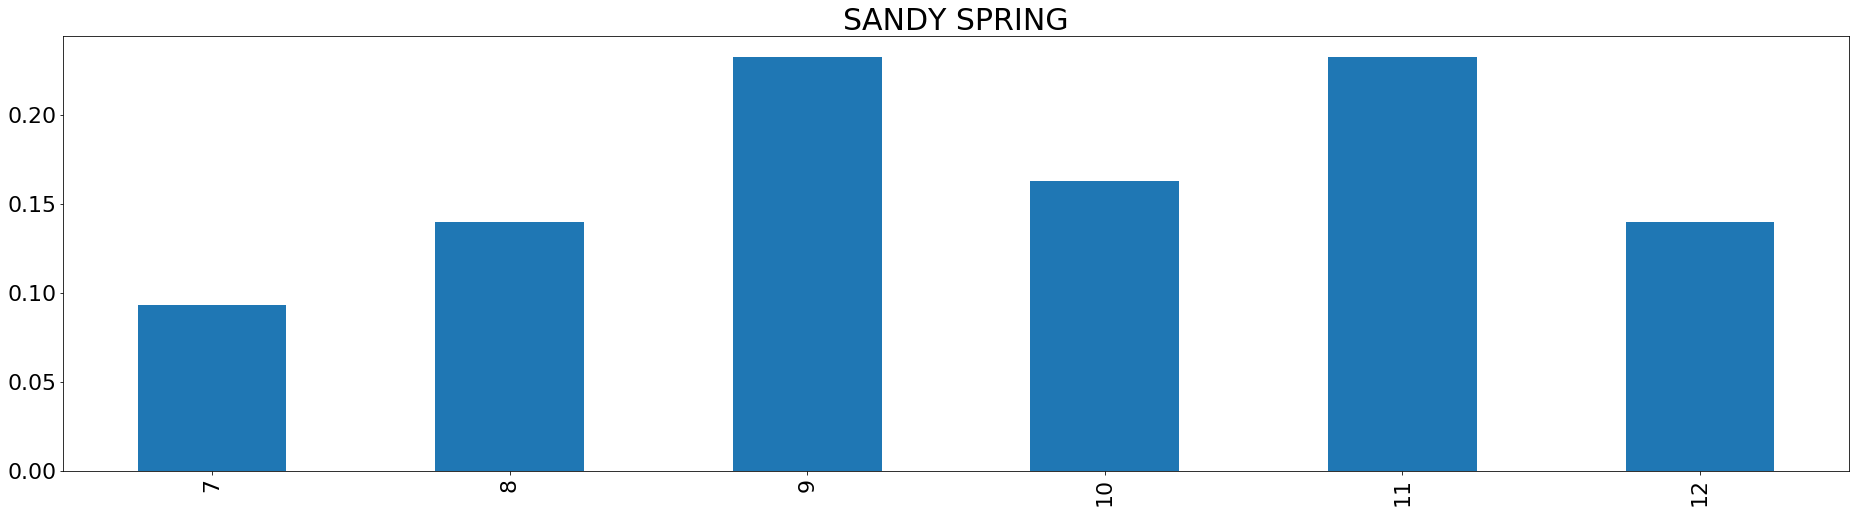

In [6]:
cities = set(crimes['City'])

for city in cities:
    pd.to_datetime(crimes[crimes['City'] == city].loc[:,"Dispatch Date / Time"]).dt.month.value_counts(normalize='True').sort_index().plot(kind='bar',
                                                                                    figsize = [32, 8],
                                                                                    fontsize=22)
    plt.title(city, fontsize=30)
    plt.show()

In [7]:

classDescriptionCol = crimes['Class'].astype(str)

def filtro_contem(coluna, regex):
  
    return coluna.str.contains(regex, case=False)

#domesticos
family = filtro_contem(classDescriptionCol,r'(?:\b201[1-6])')

#ofensas sexuais e estupro
sex_offense = filtro_contem(classDescriptionCol,r'(?:\b171[1-8]$)')
rape_crime = filtro_contem(classDescriptionCol,r'(?:\b21\d$)')

#lacerny
larceny = filtro_contem(classDescriptionCol,r'(?:\b6[1-3][1-9])')

#robbery
robbery = filtro_contem(classDescriptionCol, r"(\b3[1-4][1-8])")

auto_theft = filtro_contem(classDescriptionCol, r'\b7[1-3]')

burg = filtro_contem(classDescriptionCol, r"(?:\b5[1-3][1-9])")
#drogas/posse de drogas/
drug = filtro_contem(classDescriptionCol,r"(?:\b18[1-6][1-8])")

#ameaça de violencia
assault = filtro_contem(classDescriptionCol,r"(?:\b8[1-2][1-5])")

#AGGRAVATED ASSAULT
agg_assault = filtro_contem(classDescriptionCol, r"(?:\b4[1-4][1-5])")

#vandalismo ou dano objetos/propriedades/ incendio criminoso
vandalism= filtro_contem(classDescriptionCol,r"(?:\b14[1-2][1-7]|\b1431)")

#falsificacao cartao de credito/documentos/cheques etc 
forgery = filtro_contem(classDescriptionCol,r"(?:\b101[1-4])")

#fraude de checks
badcheck = filtro_contem(classDescriptionCol, r"(?:\b11[1-2][1-3])")

#miscleaneos não crimes (infracao, mau compartamento, delito, pessoa/veiculo suspeito)
#morte naturallost property|porperty
#perda de posse/abandono de propriedade/recuperaçao
#desaparecimento, incendio, vadiagem (menor de idade), trespassing, incidente doente mental

misc = filtro_contem(classDescriptionCol, r"(?:\b29\d\d)")

misc_trafic = filtro_contem(classDescriptionCol, r"(?:\b28\d\d)")

#leis bebidas alcolicas
liquor = filtro_contem(classDescriptionCol, r"(?:\b221[1-7])")

#suicide
suicide = filtro_contem(classDescriptionCol, r"(?:\b261[1-6]|\b262[1-6])")

#disparo de arma de fogo
weapon_offense = filtro_contem(classDescriptionCol, r"(?:\b15[1-4][1-3])")

#outros crimes class 27xx
#violaccao ordem de restrição 
other_offenses = filtro_contem(classDescriptionCol, r"(?:\b27\d\d)")

#homicidios
homicide = filtro_contem(classDescriptionCol, r"(?:\b11[1-6]$)")

#desvio de verba
embezzle = filtro_contem(classDescriptionCol, r"(?:\b121[1-4]|\b122[1-4])")

#incidentes, acidentes animals
animal = filtro_contem(classDescriptionCol, r"(?:\b3[0-1]\d{2})")

#crimes por juvenis class 2313 e 2314
juvenile = filtro_contem(classDescriptionCol, r"(?:\b211[1-4])")

#conduta desordeira
disordely = filtro_contem(classDescriptionCol, r"(?:\b241[1-3])")

# roubo de propriedade
stolen_prop = filtro_contem(classDescriptionCol, r"(?:\b1311)")

arson = filtro_contem(classDescriptionCol, r"(?:\b9[1-3][1-3])")

vice = filtro_contem(classDescriptionCol, r'(?:\b161[3-4])')


crimes[
    ~family &
    ~sex_offense&
    ~rape_crime &
    ~larceny &
    ~robbery&
    ~badcheck&
    ~drug & 
    ~assault & 
    ~agg_assault&
    ~vandalism & 
    ~forgery &
    ~misc &
    ~liquor &
    ~suicide &
    ~weapon_offense &
    ~homicide &
    ~embezzle &
    ~animal &
    ~juvenile &
    ~disordely &
    ~stolen_prop &
    ~auto_theft&
    ~burg&
    ~misc_trafic&
    ~arson&
    ~vice&
    ~other_offenses]



/home/rute/anaconda3/envs/topicosF/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,Incident ID,CR Number,Dispatch Date / Time,Class,Class Description,Police District Name,Block Address,City,State,Zip Code,...,Sector,Beat,PRA,Start Date / Time,End Date / Time,Latitude,Longitude,Police District Number,Location,Address Number


In [8]:
categorias = [family,
              sex_offense,
              rape_crime,
              larceny,
              robbery,
              badcheck,
              drug,
              assault,
              agg_assault,
              vandalism, 
              forgery,
              misc,
              liquor,
              suicide,
              weapon_offense,
              homicide,
              embezzle,
              animal,
              juvenile,
              disordely,
              stolen_prop,
              auto_theft,
              burg,
              misc_trafic,
              arson,
              vice,
              other_offenses]

concat_category = crimes[sex_offense]
for cat in categorias:
       concat_category = pd.concat([concat_category,crimes[cat]])
        
print('ok')

ok


In [9]:
concat_category.shape

(23529, 22)

In [10]:
crimes.shape

(23369, 22)

In [11]:
set(concat_category[concat_category['Incident ID'].duplicated(keep=False)].sort_values('Incident ID')['Class'])

{1711, 1712, 1713, 1714, 1715, 1716, 1718}

In [210]:
cat_str = ['Family offenses',
              'Sex offenses',
              'Rape',
              'Larceny',
              'Robbery',
              'Bad checks',
              'Drugs',
              'Assault',
              'Aggravated assault',
              'Vandalism', 
              'Forgery',
              'Miscelaneous',
              'Liquor laws',
              'Suicide',
              'Weapon_offenses',
              'Homicide',
              'Embezzle',
              'Animal offenses',
              'Juvenile',
              'Disordely conduct',
              'Stolen property',
              'Auto theft',
              'Burglary',
              'Miscelaneous traffic',
              'Arson',
              'Vice',
              'Other offenses']

In [211]:
crimes['Category'] = ''
category_dict = {}

for categoria, nome_categoria in zip(categorias, cat_str):
    crimes.loc[categoria, 'Category'] = nome_categoria

DAMASCUS


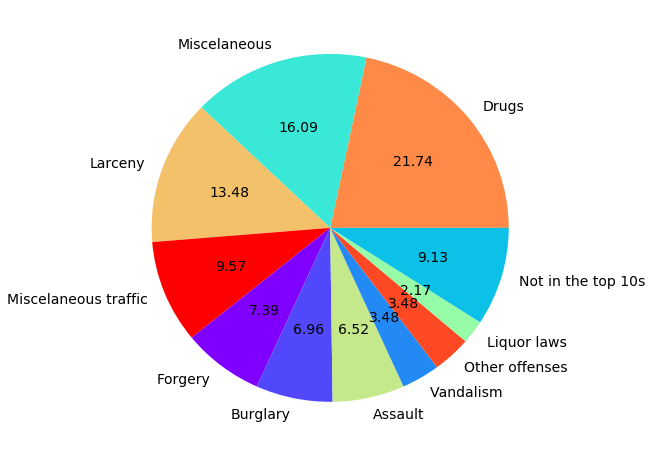

GERMANTOWN


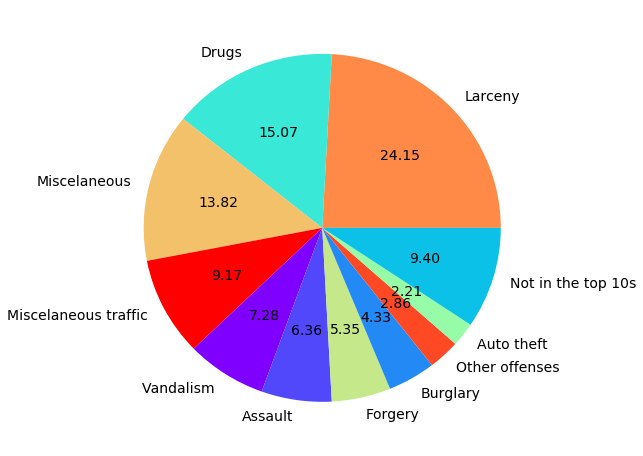

GAITHERSBURG


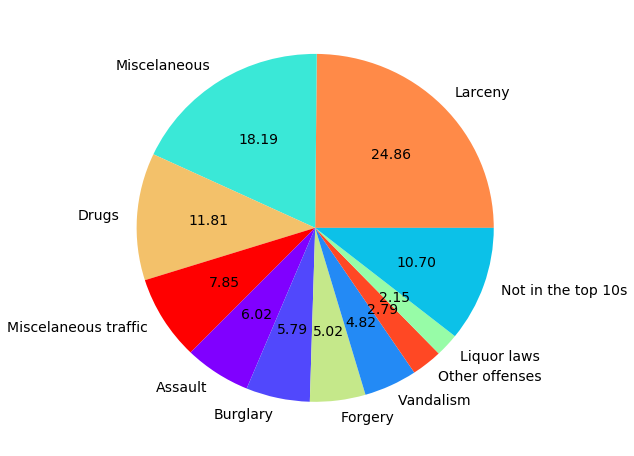

CHEVY CHASE


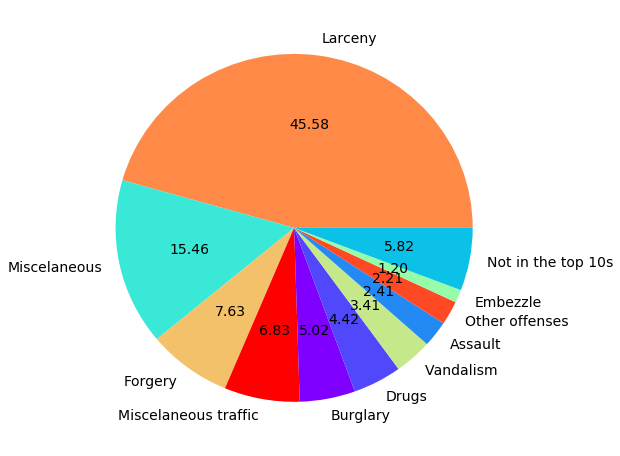

SILVER SPRING


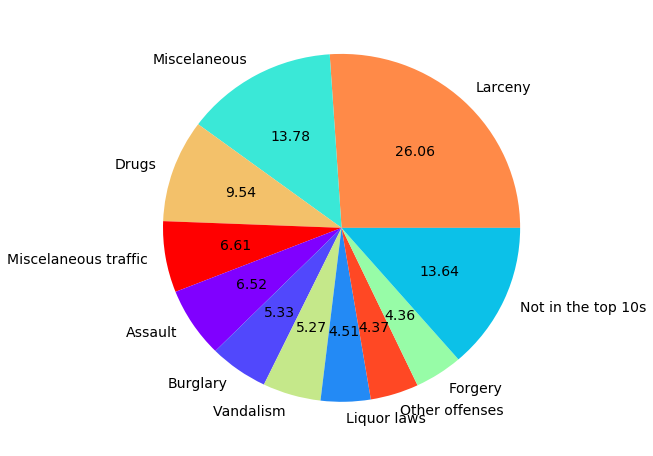

ROCKVILLE


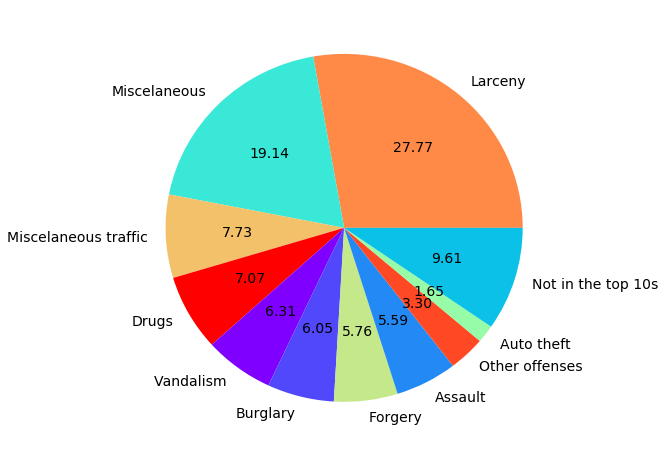

WASHINGTON GROVE


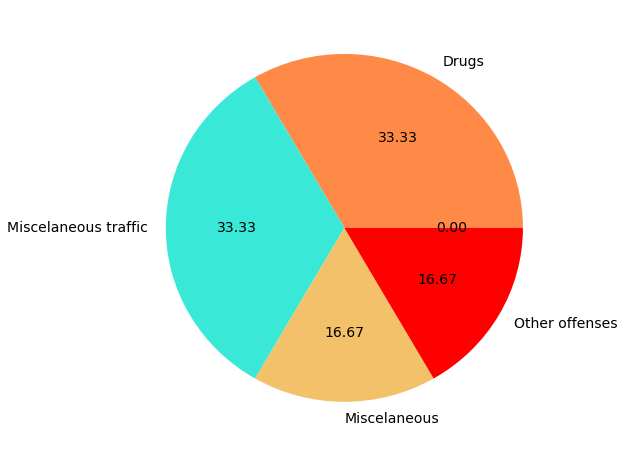

DERWOOD


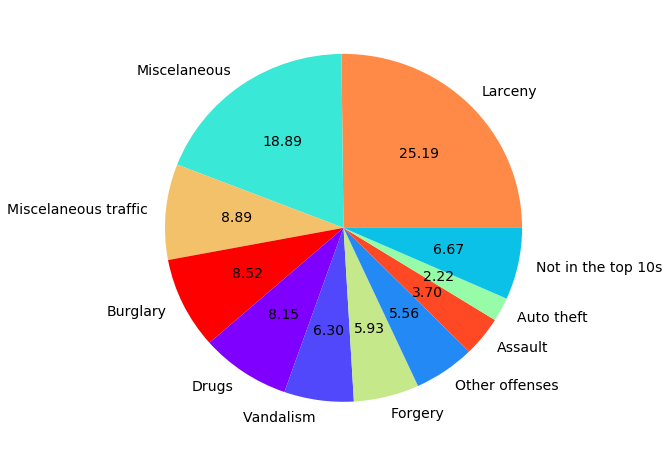

BETHESDA


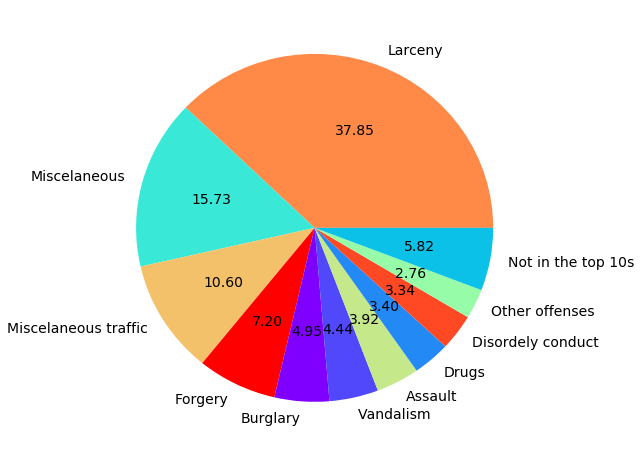

BOYDS


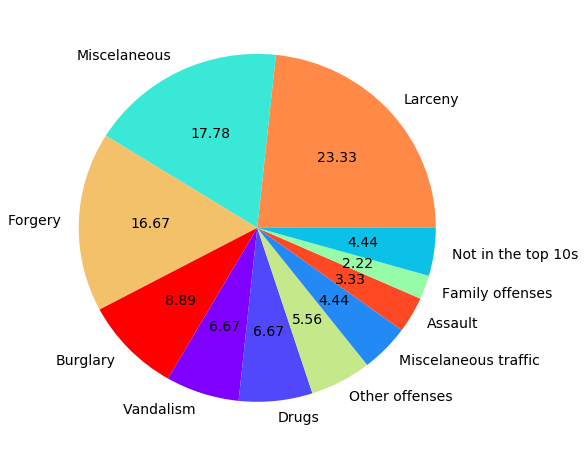

POTOMAC


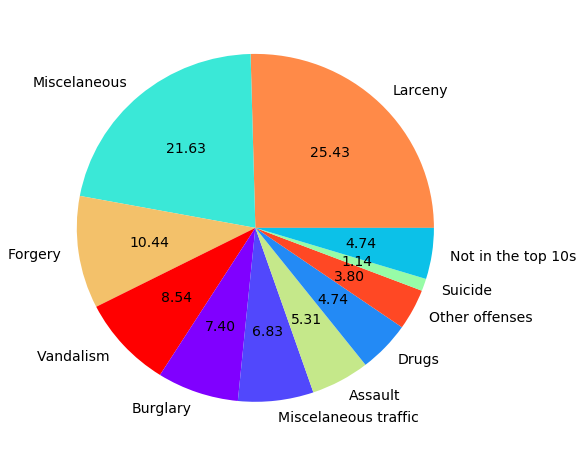

CLARKSBURG


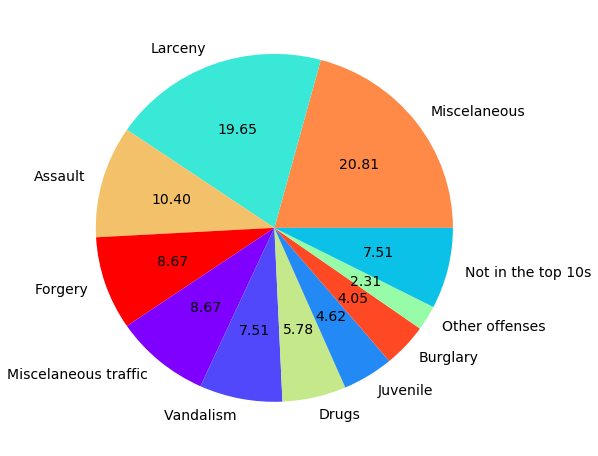

OLNEY


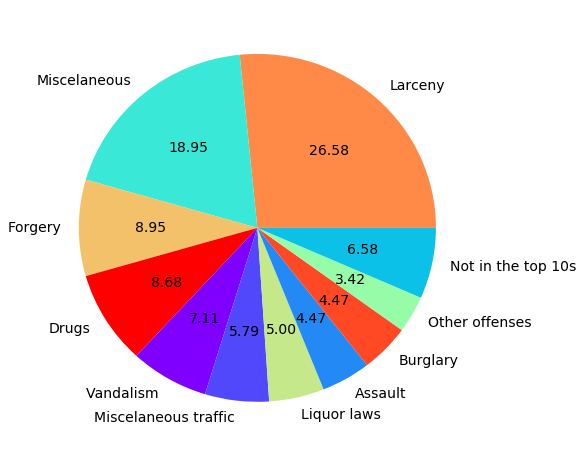

MONTGOMERY VILLAGE


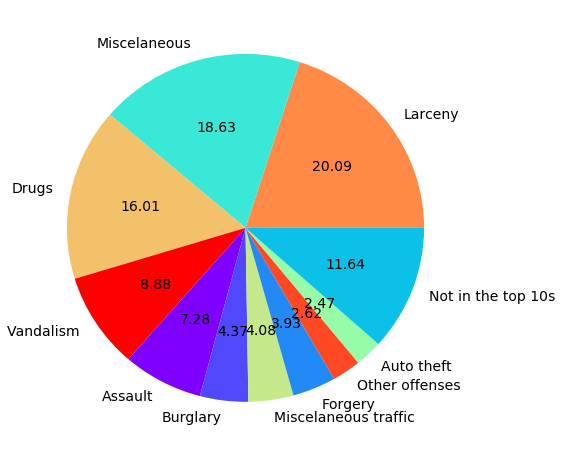

POOLESVILLE


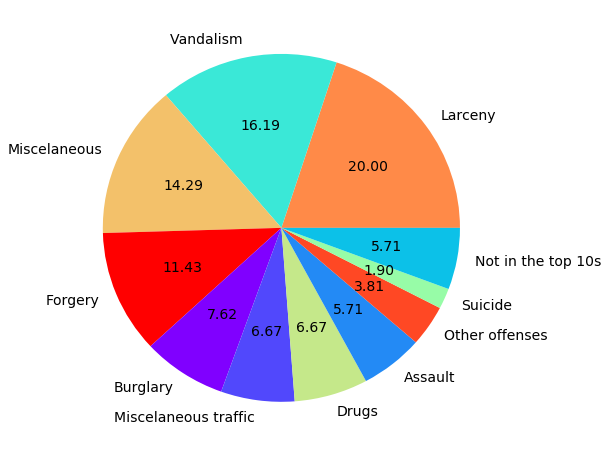

BURTONSVILLE


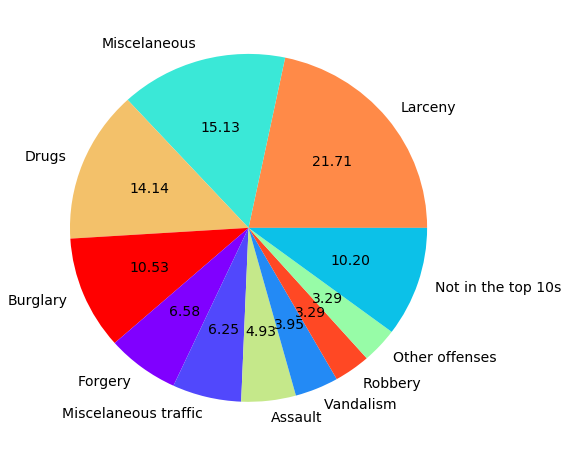

BROOKEVILLE


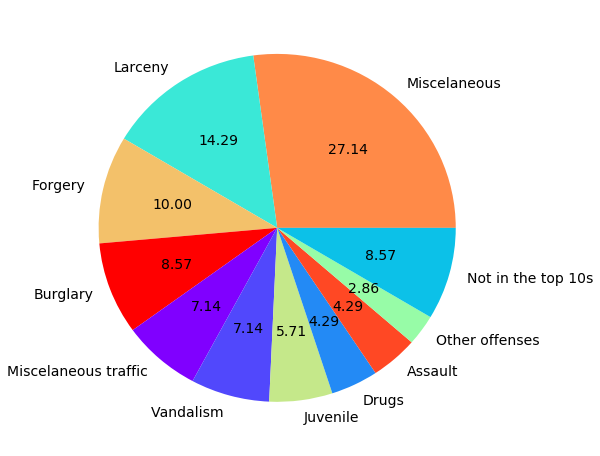

KENSINGTON


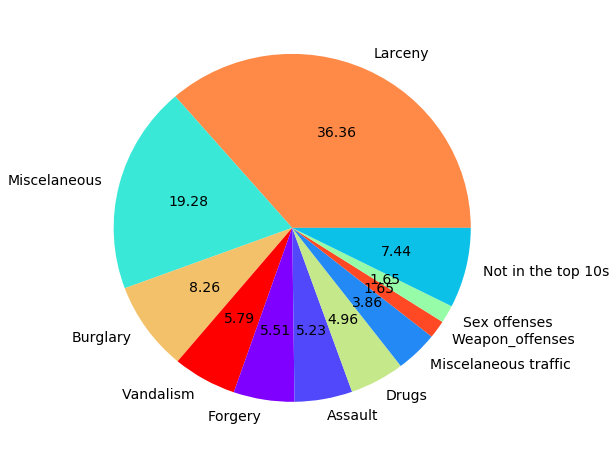

TAKOMA PARK


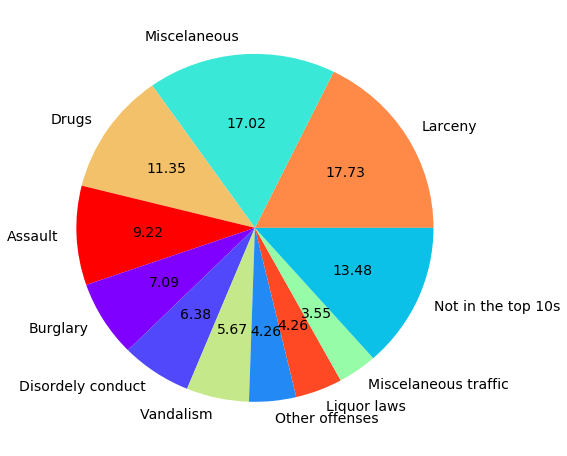

DICKERSON


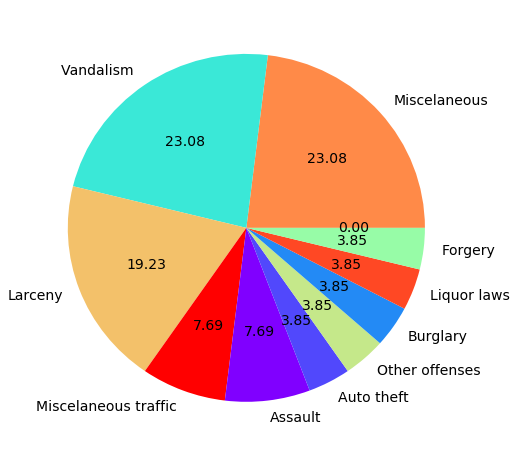

SANDY SPRING


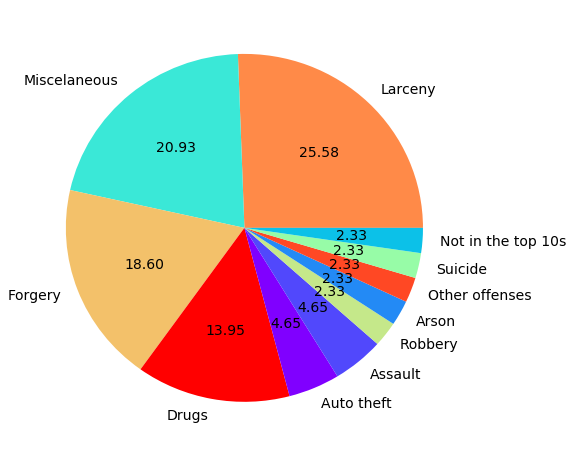

CABIN JOHN


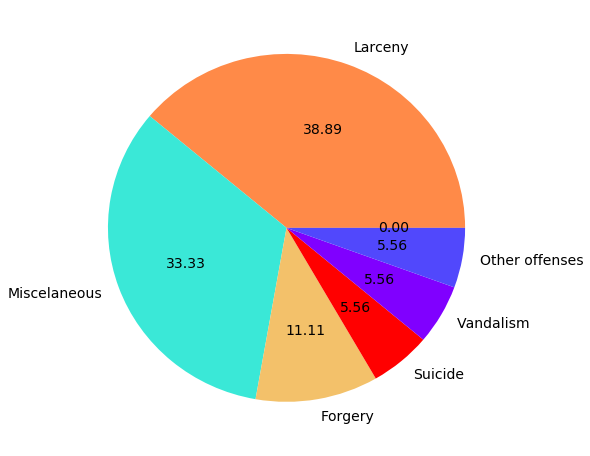

MOUNT AIRY


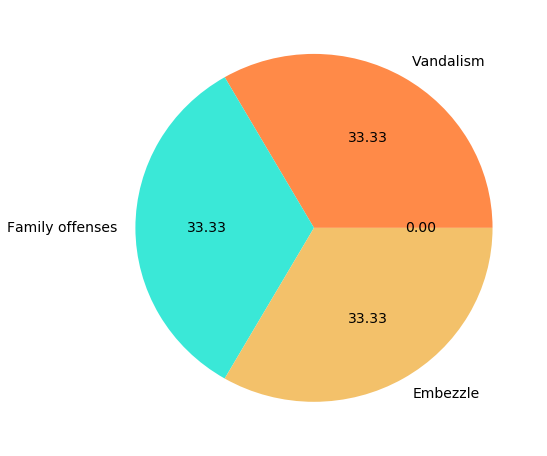

BRINKLOW


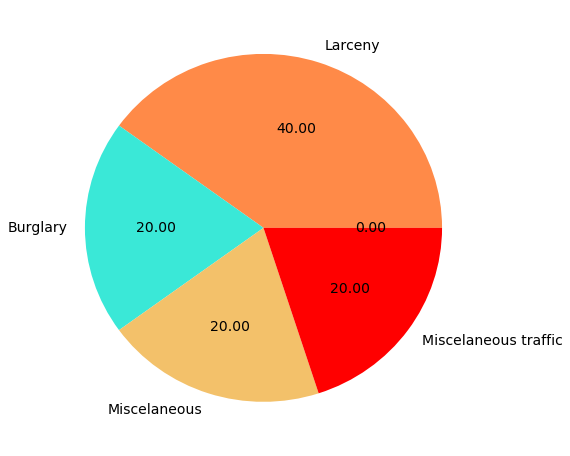

ASHTON


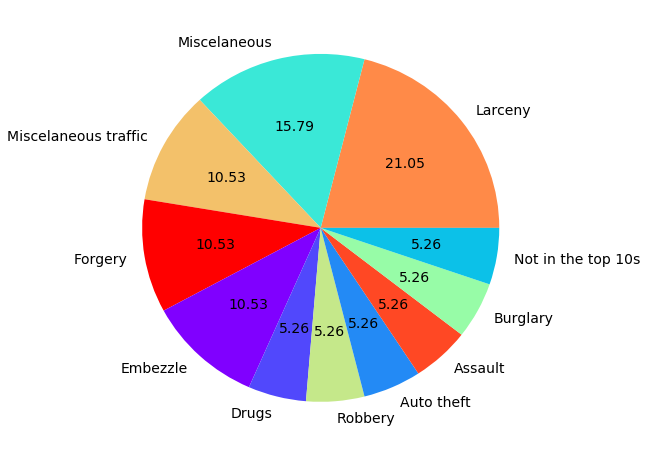

KISSIMMEE


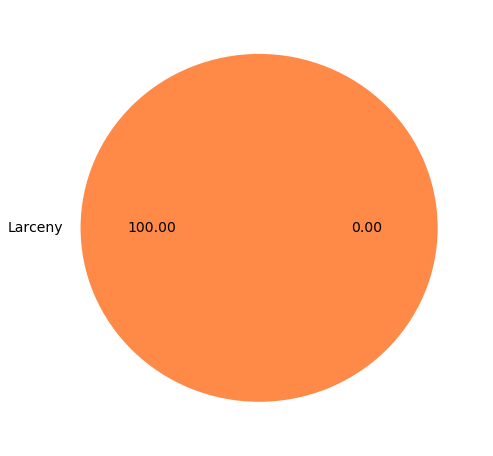

SPENCERVILLE


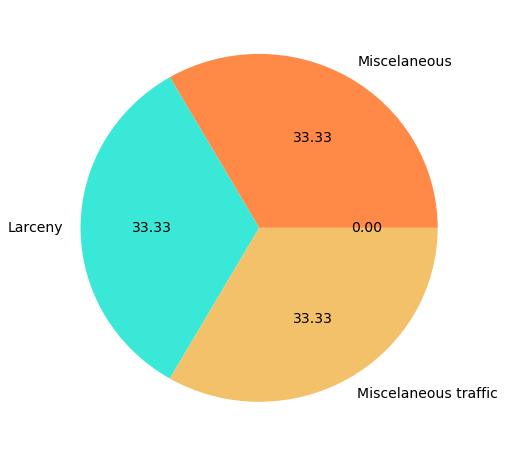

BARNESVILLE


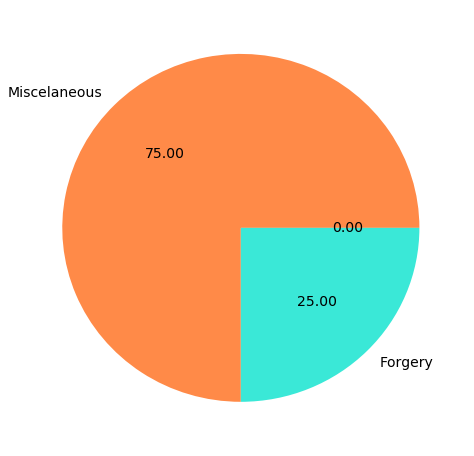

GLEN ECHO


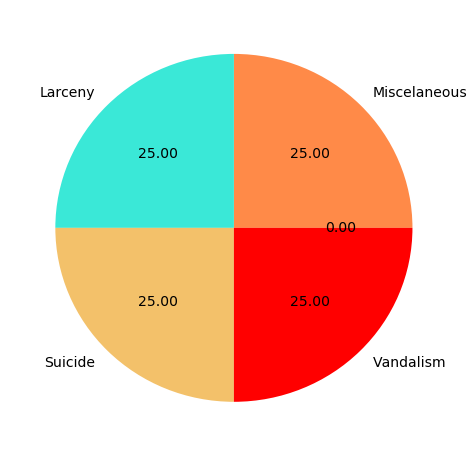

LAUREL


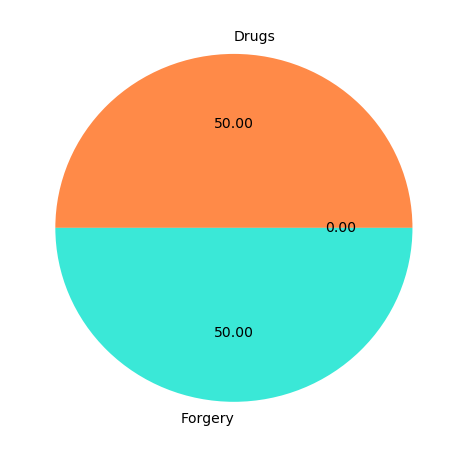

HYATTSVILLE


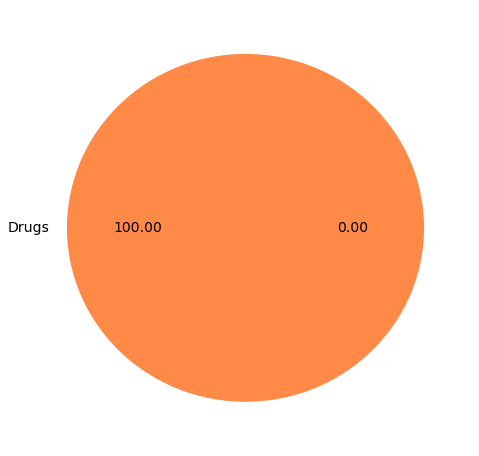

BEALLSVILLE


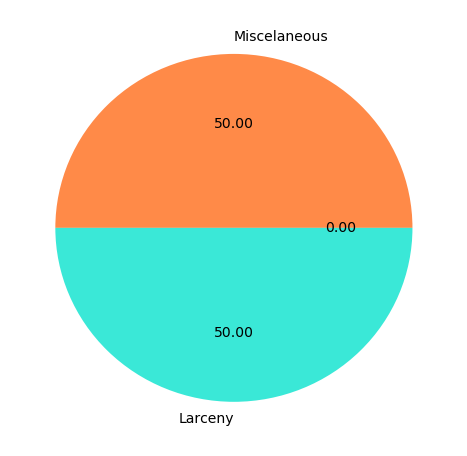

In [219]:
cities = crimes['City'].unique()
cmap = cm.get_cmap('rainbow',12)
colors=([cmap(i) for i in np.linspace(0, 1, 11)])

random.shuffle(colors)
for city in cities:
    print(city)
    crime_percent = crimes[crimes['City'] == city].loc[:,'Category'].value_counts(normalize=True)
    top_10 = crime_percent[0:10]
    top_10.name = ''
    top_10.set_value('Not in the top 10s', np.sum(crime_percent[10:]))  
    top_10.plot.pie(figsize = (8,8),autopct='%.2f', fontsize = 14, colors=colors)
    plt.show()


OTHER


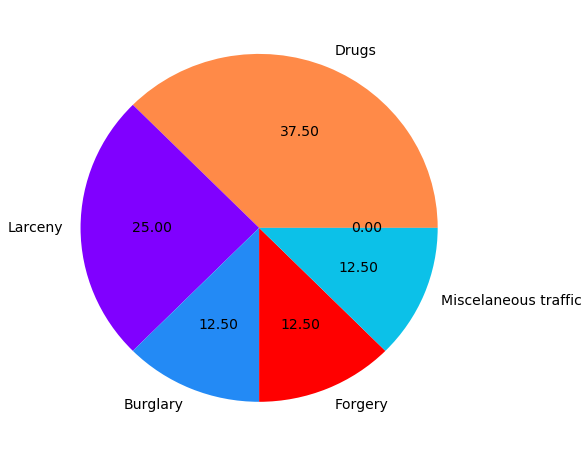

GERMANTOWN


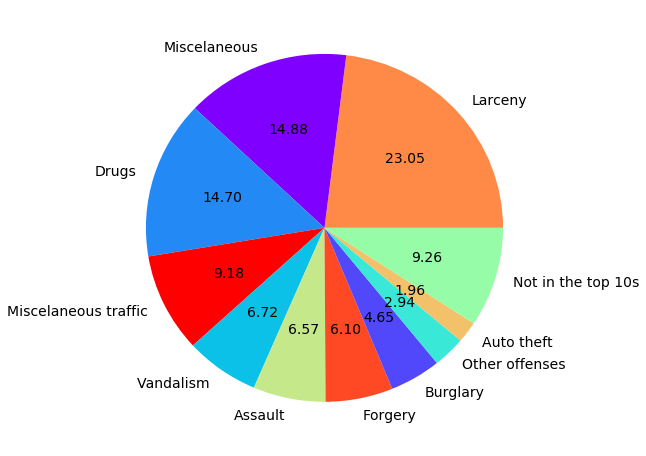

MONTGOMERY VILLAGE


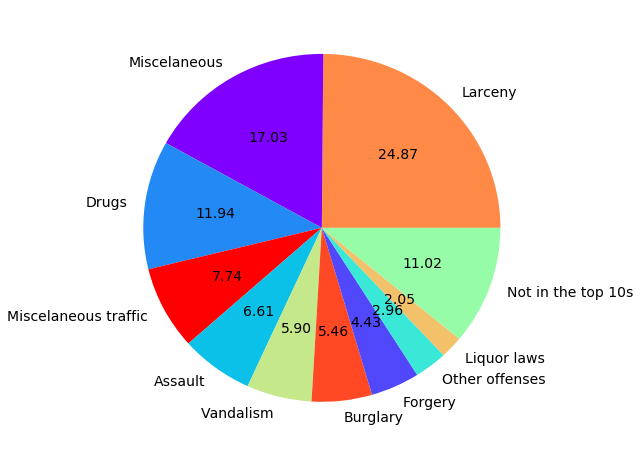

BETHESDA


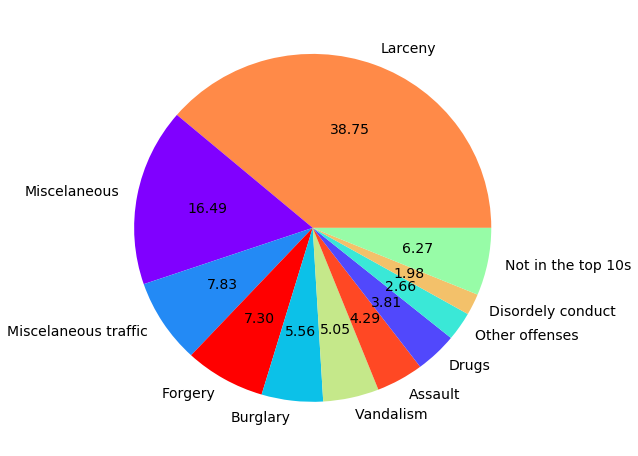

ROCKVILLE


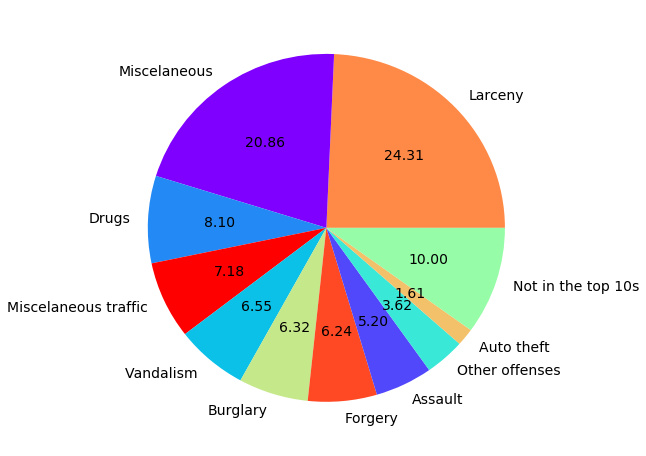

SILVER SPRING


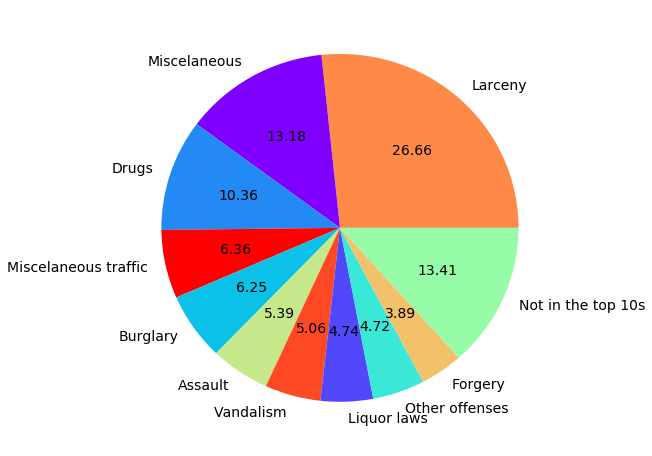

WHEATON


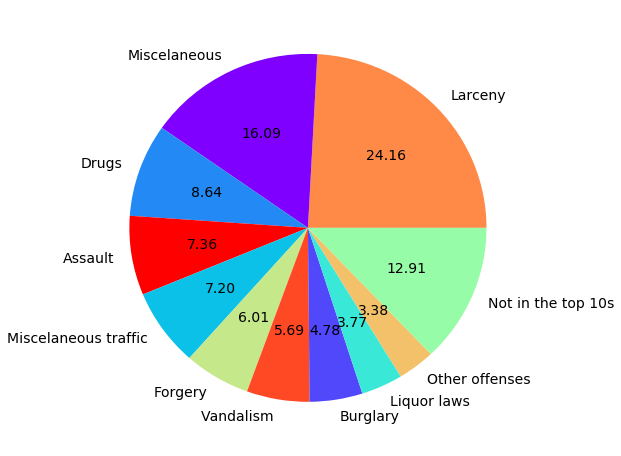

TAKOMA PARK


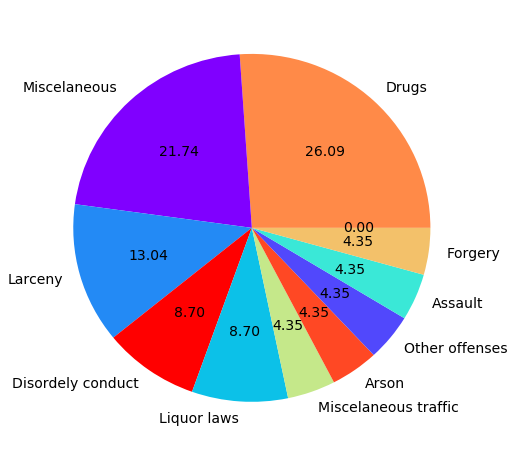

In [221]:
pd = crimes['Police District Name'].unique()
cmap = cm.get_cmap('rainbow',12)
colors=([cmap(i) for i in np.linspace(0, 1, 11)])

random.shuffle(colors)
for pol_d in pd:
    print(pol_d)
    crime_percent = crimes[crimes['Police District Name'] == pol_d].loc[:,'Category'].value_counts(normalize=True)
    top_10 = crime_percent[0:10]
    top_10.name = ''
    top_10.set_value('Not in the top 10s', np.sum(crime_percent[10:]))  
    top_10.plot.pie(figsize = (8,8),autopct='%.2f', fontsize = 14, colors=colors)
    plt.show()


In [220]:
crimes

,Incident ID,CR Number,Dispatch Date / Time,Class,Class Description,Police District Name,Block Address,City,State,Zip Code,...,Beat,PRA,Start Date / Time,End Date / Time,Latitude,Longitude,Police District Number,Location,Address Number,Category
0,200939101,13047006,10/02/2013 07:52:41 PM,511,BURG FORCE-RES/NIGHT,OTHER,25700 MT RADNOR DR,DAMASCUS,MD,20872.0,...,NaN,NaN,10/02/2013 07:52:00 PM,NaN,NaN,NaN,OTHER,NaN,25700.0,Burglary
1,200952042,13062965,12/31/2013 09:46:58 PM,1834,CDS-POSS MARIJUANA/HASHISH,GERMANTOWN,GUNNERS BRANCH RD,GERMANTOWN,MD,20874.0,...,5M1,470.0,12/31/2013 09:46:00 PM,NaN,NaN,NaN,5D,NaN,NaN,Drugs
2,200926636,13031483,07/06/2013 09:06:24 AM,1412,VANDALISM-MOTOR VEHICLE,MONTGOMERY VILLAGE,OLDE TOWNE AVE,GAITHERSBURG,MD,20877.0,...,6P3,431.0,07/06/2013 09:06:00 AM,NaN,NaN,NaN,6D,NaN,NaN,Vandalism
3,200929538,13035288,07/28/2013 09:13:15 PM,2752,FUGITIVE FROM JUSTICE(OUT OF STATE),BETHESDA,BEACH DR,CHEVY CHASE,MD,20815.0,...,2D1,11.0,07/28/2013 09:13:00 PM,NaN,NaN,NaN,2D,NaN,NaN,Other offenses
4,200930689,13036876,08/06/2013 05:16:17 PM,2812,DRIVING UNDER THE INFLUENCE,BETHESDA,BEACH DR,SILVER SPRING,MD,20815.0,...,2D3,178.0,08/06/2013 05:16:00 PM,NaN,NaN,NaN,2D,NaN,NaN,Miscelaneous traffic
5,200931009,13037095,08/07/2013 11:31:19 PM,1864,CDS IMPLMNT-MARIJUANA/HASHISH,MONTGOMERY VILLAGE,N270 CUTOVR X8 TO X9 HWY,GAITHERSBURG,MD,NaN,...,6P1,444.0,08/07/2013 11:31:00 PM,NaN,NaN,NaN,6D,NaN,NaN,Drugs
6,200931987,13037600,08/10/2013 07:52:08 PM,1833,CDS-POSS COCAINE& DERIVATIVES,MONTGOMERY VILLAGE,SAM EIG HWY,ROCKVILLE,MD,20877.0,...,6P2,660.0,08/10/2013 07:52:00 PM,NaN,NaN,NaN,6D,NaN,NaN,Drugs
7,200936488,13043769,09/15/2013 06:56:49 AM,2791,ALL OTHER NON-TRAFFIC CRIM OFFENSES,MONTGOMERY VILLAGE,WOODFIELD RD,WASHINGTON GROVE,MD,20877.0,...,6P3,419.0,09/15/2013 06:40:00 AM,NaN,NaN,NaN,6D,NaN,NaN,Other offenses
8,200938488,13046321,09/29/2013 12:44:15 AM,2812,DRIVING UNDER THE INFLUENCE,ROCKVILLE,WOOTTON PKW,ROCKVILLE,MD,20852.0,...,1A1,263.0,09/29/2013 12:44:00 AM,NaN,NaN,NaN,1D,NaN,NaN,Miscelaneous traffic
9,200939746,13047878,10/07/2013 11:39:48 PM,2812,DRIVING UNDER THE INFLUENCE,ROCKVILLE,WOOTTON PKW,ROCKVILLE,MD,20850.0,...,1A1,260.0,10/07/2013 11:39:00 PM,10/08/2013 12:30:00 AM,NaN,NaN,1D,NaN,NaN,Miscelaneous traffic
